<a href="https://colab.research.google.com/github/fabriciobagatto/analisis-energia-eolica-argentina/blob/main/analisis_energia_eolica_cammesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#═══════════════════════════════════════════════════════
#ANÁLISIS DE GENERACIÓN EÓLICA EN ARGENTINA
Proyecto Portfolio - Data Analytics aplicado al Sector Energético
#═══════════════════════════════════════════════════════

Autor: Fabricio Bagatto

Fuente de Datos: CAMMESA (Compañía Administradora del Mercado Mayorista Eléctrico)

Herramientas: Python 3.x, Google Colab, pandas, matplotlib, seaborn

#═══════════════════════════════════════════════════════

#==========================================
#FASE 1: CONTEXTO DEL PROYECTO
#==========================================

CONTEXTO ENERGÉTICO ARGENTINO

Argentina ha experimentado un crecimiento significativo en su capacidad de
generación de energías renovables en la última década:

DATOS CLAVE:
- Capacidad renovable instalada: ~500 MW (2015) → +5,000 MW (2023)
- La energía eólica representa ~60% de esta capacidad renovable
- Meta nacional: 20% de energía renovable en la matriz eléctrica (2025)

IMPULSORES DEL CRECIMIENTO:
- Marco regulatorio: Régimen de Fomento Nacional para el uso de Fuentes Renovables
- Programa RenovAr: Licitaciones públicas para incorporar energía renovable
  al sistema eléctrico nacional
- Recursos naturales: Argentina posee condiciones excepcionales para el
  desarrollo eólico, especialmente en la región patagónica

RELEVANCIA DE LA ENERGÍA EÓLICA

La energía eólica representa una de las fuentes renovables con mayor
crecimiento en el país:

- Diversificación: Contribuye a la diversificación de la matriz energética
- Sostenibilidad: Reduce la dependencia de combustibles fósiles
- Desarrollo regional: Genera empleo en zonas específicas (Patagonia, Buenos Aires)
- Medio ambiente: Mitiga emisiones de gases de efecto invernadero

==========================================

PROBLEMA DE NEGOCIO Y OBJETIVOS

==========================================

PROBLEMA DE NEGOCIO

Las empresas del sector energético necesitan información estratégica sobre
la generación eólica para:
- Optimizar inversiones en nuevos parques eólicos
- Evaluar el desempeño de activos existentes
- Planificar la integración de renovables a la red eléctrica

PREGUNTA CENTRAL:
¿Dónde, cuándo y con qué consistencia se genera energía eólica en Argentina,
y cómo ha evolucionado esta capacidad en el tiempo?

PREGUNTAS ESPECÍFICAS:

PREGUNTAS PRIMARIAS:
1. ¿Cómo ha evolucionado la generación eólica año a año?
2. ¿Qué regiones/provincias lideran la producción?

PREGUNTAS SECUNDARIAS:
3. ¿Existe estacionalidad? ¿En qué meses se genera más energía?
4. ¿Cuáles son las centrales más productivas?

PREGUNTA COMPARATIVA:
5. ¿Qué participación tiene la eólica dentro del total renovable?

OBJETIVOS DEL ANÁLISIS

OBJETIVO GENERAL:
Analizar la evolución, distribución territorial y variabilidad de la
generación de energía eólica en Argentina utilizando datos oficiales
de CAMMESA.

OBJETIVOS ESPECÍFICOS:

1. ANÁLISIS TEMPORAL
   • Identificar tendencias de crecimiento anual
   • Detectar patrones estacionales (mensuales)
   • Evaluar consistencia en la generación

2. ANÁLISIS GEOGRÁFICO
   • Mapear la distribución regional de la generación
   • Comparar capacidades productivas por provincia
   • Identificar concentración vs diversificación territorial

3. ANÁLISIS OPERATIVO
   • Ranking de centrales por producción total
   • Análisis de eficiencia relativa
   • Identificar activos estratégicos

4. INSIGHTS ESTRATÉGICOS
   • Conclusiones para planificación energética
   • Identificar oportunidades de inversión
   • Recomendaciones basadas en datos

APLICACIONES PRÁCTICAS:
Este análisis aporta información útil para:
✓ Planeamiento energético nacional y regional
✓ Evaluación de desempeño de parques eólicos
✓ Análisis de la transición energética
✓ Elaboración de reportes estratégicos para inversores

==========================================

ALCANCE Y LIMITACIONES

==========================================

ALCANCE:
- Período: 2011-2025
- Cobertura: Todo el territorio argentino
- Fuente: CAMMESA (oficial)
- Granularidad: Mensual por central

LIMITACIONES:
- No incluye datos operativos internos (factor de capacidad)
- No analiza variables climáticas
- No considera aspectos económicos/financieros
- Análisis retrospectivo (no predictivo)

## Nota sobre el Código

**Accesibilidad del Análisis:**  
Todo el código Python de este proyecto incluye comentarios detallados línea por línea para que personas sin experiencia en programación puedan comprender qué hace cada instrucción. El objetivo es que este análisis sea transparente, educativo y completamente reproducible.

# =========================================================
# FASE 2. CARGA Y COMPRENSIÓN DEL DATASET
# =========================================================

NOTA METODOLÓGICA:
Este proyecto utiliza datos oficiales de CAMMESA (Compañía Administradora del
Mercado Mayorista Eléctrico S.A.).

FUENTE ORIGINAL:
- URL: https://cammesaweb.cammesa.com/erenovables/
- Dataset: Base de Datos de Energías Renovables
- Descarga directa: https://cammesaweb.cammesa.com/erenovables/?wpdmdl=37500

REPRODUCIBILIDAD:
Para garantizar que este análisis sea reproducible por cualquier usuario:
1. El archivo Excel fue descargado de la fuente oficial (ver URL arriba)
2. Se versionó en GitHub para acceso público
3. Colab descarga automáticamente desde GitHub

In [39]:
# =============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# =============================================================================
"""
Las librerías son conjuntos de funciones pre-programadas que facilitan tareas complejas.
"""
# Manipulación y análisis de datos
import pandas as pd # Trabajar con tablas de datos (similar a Excel)
import numpy as np # Cálculos matemáticos y operaciones numéricas

# Visualización
import matplotlib.pyplot as plt # Crear gráficos básicos (líneas, barras, etc.)
import seaborn as sns # Crear gráficos estadísticos con mejor estética

# Configuración de advertencias
import warnings # Módulo para manejar advertencias de Python
warnings.filterwarnings('ignore') # Desactivar advertencias para salida más limpia

# Verificar versiones (útil para reproducibilidad)
print("="*80)
print("CONFIGURACIÓN INICIAL")
print("="*80)
print()
print("Versiones de librerías utilizadas:")
print(f"  pandas:     {pd.__version__}")
print(f"  numpy:      {np.__version__}")
print(f"  matplotlib: {plt.matplotlib.__version__}")
print(f"  seaborn:    {sns.__version__}")
print()
# NOTA: Documentar versiones permite que otros repliquen este análisis
# exactamente, ya que diferentes versiones pueden comportarse distinto.

CONFIGURACIÓN INICIAL

Versiones de librerías utilizadas:
  pandas:     2.2.2
  numpy:      2.0.2
  matplotlib: 3.10.0
  seaborn:    0.13.2



In [40]:
# =============================================================================
# CONFIGURACIÓN DE VISUALIZACIÓN
# =============================================================================
"""
Esto asegura que todas las visualizaciones tengan un aspecto consistente
y profesional a lo largo del análisis.
"""
# Estilo general
sns.set_style("whitegrid")
# Establece el estilo base de seaborn como "whitegrid" (cuadrícula blanca)
# Resultado: fondo blanco con líneas de cuadrícula grises sutiles

sns.set_palette("husl")
# Define la paleta de colores para los gráficos
# "husl": paleta de colores armoniosa y diferenciable visualmente

# Configuración de tamaño y fuentes
# 'rcParams': diccionario de configuración de matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
# 'figure.figsize': tamaño por defecto de las figuras (ancho, alto) en pulgadas
# (12, 6): gráficos de 12 pulgadas de ancho x 6 de alto (formato panorámico)

plt.rcParams['font.size'] = 10 # Tamaño base de la fuente en puntos (10pt)
plt.rcParams['axes.titlesize'] = 14 # Tamaño de los títulos de los gráficos
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes X e Y
plt.rcParams['xtick.labelsize'] = 10 # Tamaño de los números/texto en el eje X
plt.rcParams['ytick.labelsize'] = 10 # Tamaño de los números/texto en el eje Y
plt.rcParams['legend.fontsize'] = 10 # Tamaño del texto en las leyendas de los gráficos


In [41]:
# =============================================================================
# CARGA Y EXPLORACIÓN DEL DATASET
# =============================================================================

"""
FUENTE DE DATOS:
- Organización: CAMMESA (Compañía Administradora del Mercado Mayorista Eléctrico)
- URL oficial: https://cammesaweb.cammesa.com/erenovables/
- Descarga directa: https://cammesaweb.cammesa.com/erenovables/?wpdmdl=37500
- Repositorio GitHub: github.com/fabriciobagatto/analisis-energia-eolica-argentina

REPRODUCIBILIDAD:
El archivo fue descargado de la fuente oficial y versionado en GitHub
para garantizar acceso público y reproducibilidad del análisis.
"""

# =============================================================================
# CARGA DEL DATASET DESDE GITHUB
# =============================================================================

github_url = "https://raw.githubusercontent.com/fabriciobagatto/analisis-energia-eolica-argentina/main/data/Base_de_datos.xlsx"

print("="*80)
print("CARGA DEL DATASET")
print("="*80)
print()
print(f"Repositorio: github.com/fabriciobagatto/analisis-energia-eolica-argentina")
print()

try: # 'try': bloque que intenta ejecutar código que podría fallar (Si hay error, salta al bloque 'except' en lugar de detener el programa)

    # Cargar el archivo Excel directamente desde GitHub
    # pd.read_excel(): función de pandas para leer archivos Excel
    # engine='openpyxl': motor/librería para leer archivos .xlsx modernos
    df = pd.read_excel(github_url, engine='openpyxl')

    print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
     # df.shape: tupla (filas, columnas) con las dimensiones del DataFrame
    # df.shape[0]: número de filas (registros)
    # df.shape[1]: número de columnas (variables)
    # :, formatea números con separador de miles (ej: 20,403)
    print()

except Exception as e:
# 'except': bloque que se ejecuta si hubo error en el 'try'

    import subprocess
    subprocess.run(['pip', 'install', '-q', 'openpyxl'], capture_output=True)

    # Reintentar
    df = pd.read_excel(github_url, engine='openpyxl')

    print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    print()


CARGA DEL DATASET

Repositorio: github.com/fabriciobagatto/analisis-energia-eolica-argentina

Dimensiones: 20,403 filas x 10 columnas



## Proceso de Carga de Datos
```
┌─────────────────────────────────────┐
│  Definir URL del archivo en GitHub  │
└──────────────┬──────────────────────┘
               │
               ▼
┌─────────────────────────────────────┐
│  Intentar cargar archivo Excel      │
└──────────────┬──────────────────────┘
               │
         ┌─────┴─────┐
         │           │
    ¿Éxito?      ¿Error?
         │           │
         ▼           ▼
    ┌────────┐  ┌──────────────────┐
    │ Listo  │  │ Instalar openpyxl│
    └────────┘  └────────┬─────────┘
                         │
                         ▼
                ┌─────────────────┐
                │ Reintentar carga│
                └────────┬────────┘
                         │
                         ▼
                    ┌────────┐
                    │ Listo  │
                    └────────┘
```

**¿Qué hace este código?**
1. Descarga el archivo Excel directamente desde GitHub
2. Si falta una librería necesaria (openpyxl), la instala automáticamente
3. Carga los datos en una variable llamada `df` (DataFrame)
4. Muestra las dimensiones de la tabla (filas × columnas)

In [23]:
# =============================================================================
# EXPLORACIÓN INICIAL DEL DATASET
# =============================================================================

"""
OBJETIVO: Realizar una primera inspección de los datos para entender:
- Qué información contiene la tabla
- Cuántos registros y variables hay
- Qué tipos de datos tenemos
- Si hay patrones o valores inesperados
"""
print("="*80)
print("EXPLORACIÓN INICIAL")
print("="*80)
print()

print("PRIMERAS 10 FILAS:")
print("-"*80)
display(df.head(10)) # display(): función de Jupyter/Colab para mostrar tablas con formato
                     # df.head(10): devuelve las primeras 10 filas del DataFrame
print()

print("INFORMACIÓN GENERAL:")
print("-"*80)
df.info() # df.info(): muestra información técnica del DataFrame
print()

print("ESTADÍSTICAS DESCRIPTIVAS:")
print("-"*80)
display(df.describe()) # df.describe(): genera estadísticas automáticas de las columnas numéricas
print()

print("COLUMNAS DISPONIBLES:")
print("-"*80)
for i, col in enumerate(df.columns, 1): # enumerate(df.columns, 1): enumera las columnas empezando desde 1
    tipo = str(df[col].dtype) # df[col].dtype: obtiene el tipo de dato de la columna
                              # str(): convierte el tipo a texto para mostrarlo

    n_unicos = df[col].nunique() # df[col].nunique(): cuenta cuántos valores únicos/distintos hay
    print(f"{i:2d}. {col:35s} | Tipo: {tipo:10s} | Únicos: {n_unicos:,}")
print()



EXPLORACIÓN INICIAL

PRIMERAS 10 FILAS:
--------------------------------------------------------------------------------


,AÑO,CENTRAL,CENTRAL DESCRIPCIÓN,MAQUINA,FUENTE DE ENERGÍA,REGIÓN,PROVINCIA,MES,ENERGÍA GENERADA [GWh],Nueva Generación
0,2011,AESP,AES PARANA,AESPCC01,BIODIESEL,BUENOS AIRES,BUENOS AIRES,2011-01-01,0.000000,Resto
1,2011,AESP,AES PARANA,AESPCC02,BIODIESEL,BUENOS AIRES,BUENOS AIRES,2011-01-01,0.000000,Resto
2,2011,AMEGHI,F. AMEGHINO,AMEGHI,HIDRO <=50MW,PATAGONIA,CHUBUT,2011-01-01,13.751828,Resto
3,2011,ARAUEO,ARAUCO EOLICO,ARAUEO,EOLICO,NOROESTE,LA RIOJA,2011-01-01,0.073369,Resto
4,2011,CADIHI,CADILLAL,CADIHI,HIDRO <=50MW,NOROESTE,TUCUMAN,2011-01-01,0.589851,Resto
5,2011,CALEHI,LA CALERA,CALEHI,HIDRO <=50MW,CENTRO,CORDOBA,2011-01-01,0.894264,Resto
6,2011,CARRHI,CH CARRIZAL,CARRHI,HIDRO <=50MW,CUYO,MENDOZA,2011-01-01,5.417433,Resto
7,2011,CASSHI,CASSAFOUSTH,CASSHI,HIDRO <=50MW,CENTRO,CORDOBA,2011-01-01,4.132313,Resto
8,2011,CEJEHI,CRUZ DEL EJE,CEJEHI,HIDRO <=50MW,CENTRO,CORDOBA,2011-01-01,0.000000,Resto
9,2011,COROHI,CH LS CORONELES,COROHI,HIDRO <=50MW,CUYO,MENDOZA,2011-01-01,0.000000,Resto



INFORMACIÓN GENERAL:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20403 entries, 0 to 20402
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AÑO                     20403 non-null  int64         
 1   CENTRAL                 20403 non-null  object        
 2   CENTRAL DESCRIPCIÓN     20403 non-null  object        
 3   MAQUINA                 20403 non-null  object        
 4   FUENTE DE ENERGÍA       20403 non-null  object        
 5   REGIÓN                  20403 non-null  object        
 6   PROVINCIA               20403 non-null  object        
 7   MES                     20403 non-null  datetime64[ns]
 8   ENERGÍA GENERADA [GWh]  20403 non-null  float64       
 9   Nueva Generación        20403 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory us

,AÑO,MES,ENERGÍA GENERADA [GWh]
count,20403.000000,20403,20403.000000
mean,2020.352350,2020-10-22 18:25:48.831054080,102.477492
min,2011.000000,2011-01-01 00:00:00,0.000000
25%,2018.000000,2018-09-01 00:00:00,0.486313
50%,2021.000000,2021-11-01 00:00:00,2.391933
75%,2024.000000,2024-01-01 00:00:00,8.704057
max,2025.000000,2025-10-01 00:00:00,13996.904605
std,3.928772,NaN,1021.665081



COLUMNAS DISPONIBLES:
--------------------------------------------------------------------------------
 1. AÑO                                 | Tipo: int64      | Únicos: 15
 2. CENTRAL                             | Tipo: object     | Únicos: 258
 3. CENTRAL DESCRIPCIÓN                 | Tipo: object     | Únicos: 257
 4. MAQUINA                             | Tipo: object     | Únicos: 266
 5. FUENTE DE ENERGÍA                   | Tipo: object     | Únicos: 7
 6. REGIÓN                              | Tipo: object     | Únicos: 10
 7. PROVINCIA                           | Tipo: object     | Únicos: 23
 8. MES                                 | Tipo: datetime64[ns] | Únicos: 178
 9. ENERGÍA GENERADA [GWh]              | Tipo: float64    | Únicos: 18,259
10. Nueva Generación                    | Tipo: object     | Únicos: 8



In [42]:
# =============================================================================
# ANÁLISIS DE CALIDAD DE DATOS
# =============================================================================
"""
OBJETIVO: Evaluar la calidad de los datos identificando:
- Valores faltantes (nulos)
- Diversidad de valores en cada columna
- Posibles problemas de calidad que debemos corregir
"""
print("="*80)
print("CALIDAD DE DATOS")
print("="*80)
print()

# Valores nulos
print("VALORES NULOS POR COLUMNA:")
print("-"*80)
nulos = df.isnull().sum() # df.isnull(): crea una tabla de True/False (True = valor nulo)
                          # .sum(): cuenta cuántos True hay por columna (total de nulos)
nulos_pct = (df.isnull().sum() / len(df)) * 100 # Calcula el porcentaje de nulos
calidad = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje (%)': nulos_pct.round(2)
})
# pd.DataFrame(): crea una nueva tabla con los resultados de cantidad de nulos y porcentaje de nulos

if calidad['Valores Nulos'].sum() > 0:
    print(calidad[calidad['Valores Nulos'] > 0])
else:
    print("No se detectaron valores nulos en el dataset")
print()
# Funcion para calcular la cantidad de nulos

# Valores únicos
print("VALORES ÚNICOS POR COLUMNA:")
print("-"*80)
for col in df.columns:
    n_unicos = df[col].nunique() # Cuenta cuántos valores diferentes hay en esta columna
    print(f"{col:35s}: {n_unicos:6,} valores únicos")
print()

# =============================================================================
# ANÁLISIS DE VARIABLES CLAVE
# =============================================================================

print("="*80)
print("ANÁLISIS DE VARIABLES CLAVE")
print("="*80)
print()

if 'FUENTE DE ENERGÍA' in df.columns:
   # if: verifica que la columna exista antes de analizarla
    print("TIPOS DE FUENTE DE ENERGÍA:")
    print("-"*80)
    print(df['FUENTE DE ENERGÍA'].value_counts()) # value_counts(): cuenta cuántas veces aparece cada valor único
    print()

if 'REGIÓN' in df.columns:
    print("REGIONES:")
    print("-"*80)
    print(df['REGIÓN'].value_counts())# Muestra cuántos registros hay por cada región
    print()

if 'PROVINCIA' in df.columns:
    print("PROVINCIAS:")
    print("-"*80)
    print(df['PROVINCIA'].value_counts()) # Muestra la distribución de registros por provincia
    print()

if 'AÑO' in df.columns:
    print("RANGO TEMPORAL:")
    print("-"*80)
    print(f"Año mínimo: {df['AÑO'].min()}")# df['AÑO'].min(): encuentra el año más antiguo en los datos
    print(f"Año máximo: {df['AÑO'].max()}")# df['AÑO'].max(): encuentra el año más reciente
    print(f"Período analizado: {df['AÑO'].max() - df['AÑO'].min() + 1} años")# Calcula cuántos años abarca el dataset
    print()

print("="*80)
print("EXPLORACIÓN COMPLETADA")
print("="*80)

CALIDAD DE DATOS

VALORES NULOS POR COLUMNA:
--------------------------------------------------------------------------------
No se detectaron valores nulos en el dataset

VALORES ÚNICOS POR COLUMNA:
--------------------------------------------------------------------------------
AÑO                                :     15 valores únicos
CENTRAL                            :    258 valores únicos
CENTRAL DESCRIPCIÓN                :    257 valores únicos
MAQUINA                            :    266 valores únicos
FUENTE DE ENERGÍA                  :      7 valores únicos
REGIÓN                             :     10 valores únicos
PROVINCIA                          :     23 valores únicos
MES                                :    178 valores únicos
ENERGÍA GENERADA [GWh]             : 18,259 valores únicos
Nueva Generación                   :      8 valores únicos

ANÁLISIS DE VARIABLES CLAVE

TIPOS DE FUENTE DE ENERGÍA:
-----------------------------------------------------------------------

#=========================================================
#FASE 3. LIMPIEZA Y PREPROCESAMIENTO DE LOS DATOS
#=========================================================

En esta fase realizamos:
- Filtrado exclusivo de energía eólica
- Limpieza y estandarización de nombres de columnas y categorías
- Creación robusta de variable temporal (FECHA)
- Validación y tratamiento de valores anómalos en generación
- Estandarización geográfica
- Resumen final del dataset limpio

In [25]:
# =============================================================================
# LIMPIEZA Y PREPROCESAMIENTO
# =============================================================================

print("="*80)
print("INICIO DE LIMPIEZA Y PREPROCESAMIENTO")
print("="*80)
print()

# -----------------------------------------------------------------------------
# 1. FILTRADO: SOLO ENERGÍA EÓLICA
# -----------------------------------------------------------------------------

"""
¿POR QUÉ FILTRAMOS?
El dataset original contiene TODAS las fuentes renovables (eólica, solar,
hidráulica, etc.). Nuestro análisis se enfoca exclusivamente en energía
eólica, por lo que necesitamos separar esos registros.
"""

print("PASO 1: FILTRADO DE ENERGÍA EÓLICA")
print("-"*80)

# Mostrar fuentes disponibles
print("Fuentes de energía en el dataset:")
display(df['FUENTE DE ENERGÍA'].value_counts()) # .value_counts(): cuenta cuántos registros hay de cada tipo
                                                # display(): muestra la tabla con formato legible

# Guardar copia completa por seguridad
df_completo = df.copy() #df.copy(): crea una copia INDEPENDIENTE del DataFrame original

# Filtrar energía eólica (verificar ortografía exacta: 'EOLICO' en mayúsculas)
df_eolica = df[df['FUENTE DE ENERGÍA'] == 'EOLICO'].copy() # Crea un df solo con la energia eólica

print(f"\nRegistros totales (todas las fuentes): {len(df):,}") # len(df): cuenta el número de filas en el DataFrame original
print(f"Registros eólicos: {len(df_eolica):,}") # len(df_eolica): cuenta cuántas filas quedaron después del filtro
print(f"Participación eólica: {(len(df_eolica)/len(df)*100):.2f}%") # Calcula qué porcentaje del dataset corresponde a energía eólica

if len(df_eolica) == 0:
    raise ValueError("ERROR: No se encontraron registros con 'EOLICO'. Verificar valores únicos en 'FUENTE DE ENERGÍA'") # raise ValueError(): detiene el programa y muestra un mensaje de error

print("\nMuestra de datos eólicos:")
display(df_eolica[['AÑO', 'MES', 'CENTRAL', 'PROVINCIA', 'ENERGÍA GENERADA [GWh]']].head(10)) # MUESTRA las primeras 10 líneas del nuevo df
print()

INICIO DE LIMPIEZA Y PREPROCESAMIENTO

PASO 1: FILTRADO DE ENERGÍA EÓLICA
--------------------------------------------------------------------------------
Fuentes de energía en el dataset:


,count
FUENTE DE ENERGÍA,
HIDRO <=50MW,6772
EOLICO,5226
SOLAR,4058
BIOGAS,2299
BIOMASA,1635
BIODIESEL,235
Demanda MEM,178



Registros totales (todas las fuentes): 20,403
Registros eólicos: 5,226
Participación eólica: 25.61%

Muestra de datos eólicos:


,AÑO,MES,CENTRAL,PROVINCIA,ENERGÍA GENERADA [GWh]
3,2011,2011-01-01,ARAUEO,LA RIOJA,0.073369
12,2011,2011-01-01,DIADEO,CHUBUT,0.000000
23,2011,2011-01-01,NECOEO,BUENOS AIRES,0.030119
46,2011,2011-02-01,ARAUEO,LA RIOJA,0.603015
55,2011,2011-02-01,DIADEO,CHUBUT,0.000000
66,2011,2011-02-01,NECOEO,BUENOS AIRES,0.021586
89,2011,2011-03-01,ARAUEO,LA RIOJA,0.717622
98,2011,2011-03-01,DIADEO,CHUBUT,0.000000
109,2011,2011-03-01,NECOEO,BUENOS AIRES,0.009679
132,2011,2011-04-01,ARAUEO,LA RIOJA,0.678452


In [26]:
# -----------------------------------------------------------------------------
# 2. LIMPIEZA DE NOMBRES DE COLUMNAS
# -----------------------------------------------------------------------------
"""
OBJETIVO:
Limpiar y estandarizar los nombres de las columnas para evitar errores
causados por espacios ocultos o inconsistencias en el formato.
"""

print("PASO 2: LIMPIEZA DE COLUMNAS")
print("-"*80)

# Eliminar espacios al inicio/final en nombres de columnas
df_eolica.columns = df_eolica.columns.str.strip()


print("Columnas finales:")
for i, col in enumerate(df_eolica.columns, 1):
    print(f"{i:2d}. {col}") # Imprime los nombres de las columnas
print()

PASO 2: LIMPIEZA DE COLUMNAS
--------------------------------------------------------------------------------
Columnas finales:
 1. AÑO
 2. CENTRAL
 3. CENTRAL DESCRIPCIÓN
 4. MAQUINA
 5. FUENTE DE ENERGÍA
 6. REGIÓN
 7. PROVINCIA
 8. MES
 9. ENERGÍA GENERADA [GWh]
10. Nueva Generación



In [27]:
# -----------------------------------------------------------------------------
# 3. CREACIÓN ROBUSTA DE VARIABLE FECHA
# -----------------------------------------------------------------------------
"""
OBJETIVO:
Crear una variable de fecha unificada que combine AÑO y MES.
Esto permite análisis de series temporales y facilita gráficos cronológicos.
"""

print("PASO 3: CREACIÓN DE VARIABLE FECHA")
print("-"*80)

# Manejo flexible del campo MES
if pd.api.types.is_datetime64_any_dtype(df_eolica['MES']): # Verifica si una columna es tipo fecha; Devuelve True si MES ya tiene formato de fecha

    df_eolica['MES_NUM'] = df_eolica['MES'].dt.month  # .dt.month: extrae el número de mes (1-12) de una fecha

else: # Si MES no es datetime, asumimos que es numérico o texto

    print("Columna 'MES' es numérica/texto → usando directamente")
    df_eolica['MES_NUM'] = df_eolica['MES']  # Copiamos directamente los valores

# Convertir AÑO y MES a numérico (por si hay texto raro)
df_eolica['AÑO'] = pd.to_numeric(df_eolica['AÑO'], errors='coerce')
# pd.to_numeric(): intenta convertir valores a números
# errors='coerce': si encuentra algo que NO se puede convertir a número, lo convierte a NaN (Not a Number = valor nulo)

df_eolica['MES_NUM'] = pd.to_numeric(df_eolica['MES_NUM'], errors='coerce') # hace lo mismo para los meses

# Eliminar registros con año o mes inválidos
registros_antes = len(df_eolica) # Guarda cuántos registros tenemos ahora para poder reportar cuántos eliminamos

df_eolica = df_eolica.dropna(subset=['AÑO', 'MES_NUM'])
# .dropna(): elimina filas que tienen valores nulos (NaN)
# subset=['AÑO', 'MES_NUM']: solo considera estas dos columnas

df_eolica = df_eolica[(df_eolica['MES_NUM'] >= 1) & (df_eolica['MES_NUM'] <= 12)]
# Filtro adicional: solo meses válidos (1 a 12)

if registros_antes != len(df_eolica): # Si se elimina algún registro, lo reportamos
    print(f"Registros eliminados por datos temporales inválidos: {registros_antes - len(df_eolica)}")

# Convertir a enteros
df_eolica['AÑO'] = df_eolica['AÑO'].astype(int) # .astype(int): convierte a entero (número sin decimales)
df_eolica['MES_NUM'] = df_eolica['MES_NUM'].astype(int)

# Crear fecha (primer día del mes)
df_eolica['FECHA'] = pd.to_datetime(
    df_eolica['AÑO'].astype(str) + '-' +
    df_eolica['MES_NUM'].astype(str).str.zfill(2) + '-01' # Primero pasamos todos los valores a texto y luego pasamos el texto a valor de fecha
)

# Verificación final
print(f"Rango temporal final: {df_eolica['FECHA'].min().strftime('%Y-%m')} → {df_eolica['FECHA'].max().strftime('%Y-%m')}") # Busca la fecha mas antigua y la mas reciente para calcular el rango de tiempo
print(f"Registros válidos tras limpieza temporal: {len(df_eolica):,}\n")

# Ordenar cronológicamente
df_eolica = df_eolica.sort_values('FECHA').reset_index(drop=True)

PASO 3: CREACIÓN DE VARIABLE FECHA
--------------------------------------------------------------------------------
Rango temporal final: 2011-01 → 2025-10
Registros válidos tras limpieza temporal: 5,226



In [28]:
# -----------------------------------------------------------------------------
# 4. ESTANDARIZACIÓN GEOGRÁFICA
# -----------------------------------------------------------------------------
print("PASO 4: ESTANDARIZACIÓN DE PROVINCIAS Y REGIONES")
print("-"*80)

df_eolica['PROVINCIA'] = df_eolica['PROVINCIA'].str.strip().str.title()
df_eolica['REGIÓN'] = df_eolica['REGIÓN'].str.strip().str.title()# .str.strip() - Elimina espacios al inicio y final
                                                                 # .str.title() - Convierte a formato "Title Case" (primera letra mayúscula de cada palabra)

print("Provincias únicas (estandarizadas):")
display(df_eolica['PROVINCIA'].value_counts())  # Muestra cuantos valores hay por cada provincia

print("\nRegiones únicas (estandarizadas):")
display(df_eolica['REGIÓN'].value_counts())  # Muestra cuantos valores hay por cada región
print()

PASO 4: ESTANDARIZACIÓN DE PROVINCIAS Y REGIONES
--------------------------------------------------------------------------------
Provincias únicas (estandarizadas):


,count
PROVINCIA,
Chubut,2102
Buenos Aires,1703
La Rioja,416
Santa Cruz,312
Cordoba,260
Rio Negro,154
Santiago Del Estero,106
La Pampa,82
Neuquén,65



Regiones únicas (estandarizadas):


,count
REGIÓN,
Patagonia,2414
Buenos Aires,1703
Noroeste,522
Comahue,301
Centro,286


In [29]:
# -----------------------------------------------------------------------------
# 5. VALIDACIÓN DE GENERACIÓN ENERGÉTICA
# -----------------------------------------------------------------------------
print("PASO 5: VALIDACIÓN DE ENERGÍA GENERADA")
print("-"*80)

col_generacion = 'ENERGÍA GENERADA [GWh]' # Guarda el nombre de la columna en una variable

# Valores negativos
negativos = df_eolica[df_eolica[col_generacion] < 0] # Crea un DataFrame con solo los registros donde la generación es negativa
if len(negativos) > 0:
    print(f"Advertencia: {len(negativos)} registros con generación negativa → eliminados")
    df_eolica = df_eolica[df_eolica[col_generacion] >= 0]
else:
    print("No se detectaron valores negativos") # Con esta función detectamos si hay valores negativos

# Estadísticas descriptivas
print("\nEstadísticas de generación (GWh):")
display(df_eolica[col_generacion].describe()) # .describe(): genera automáticamente estadísticas

# Detección de outliers (método IQR conservador)
Q1 = df_eolica[col_generacion].quantile(0.25) # quantile(0.25): calcula el percentil 25 (primer cuartil)

Q3 = df_eolica[col_generacion].quantile(0.75) # quantile(0.75): calcula el percentil 75 (tercer cuartil)

IQR = Q3 - Q1 # IQR (Interquartile Range): Rango intercuartílico - Mide la dispersión del 50% central de los datos

limite = Q3 + 3 * IQR # Regla para detectar outliers: Valores mayores a Q3 + 3*IQR son considerados atípicos
                      # 3*IQR es más conservador que 1.5

outliers = df_eolica[df_eolica[col_generacion] > limite] # Filtra registros que superan el límite establecido

print(f"\nOutliers detectados (>{limite:.1f} GWh): {len(outliers)} registros") # Reporta cuántos outliers hay
if len(outliers) > 0:
    print("→ Estos suelen corresponder a centrales grandes en meses de alta producción (no eliminados)")
# DECISIÓN IMPORTANTE: NO eliminamos los outliers
# ¿Por qué?
    #   - Son datos reales de centrales grandes en meses ventosos
    #   - Eliminarlos distorsionaría el análisis de producción total
    #   - Queremos estudiar también las centrales más productivas
print()

PASO 5: VALIDACIÓN DE ENERGÍA GENERADA
--------------------------------------------------------------------------------
No se detectaron valores negativos

Estadísticas de generación (GWh):


,ENERGÍA GENERADA [GWh]
count,5226.000000
mean,17.629830
std,15.356961
min,0.000000
25%,6.004093
50%,14.130675
75%,25.331390
max,99.328799



Outliers detectados (>83.3 GWh): 14 registros
→ Estos suelen corresponder a centrales grandes en meses de alta producción (no eliminados)



In [30]:
# -----------------------------------------------------------------------------
# 6. RESUMEN FINAL DEL DATASET LIMPIO
# -----------------------------------------------------------------------------
print("="*80)
print("RESUMEN DEL DATASET LIMPIO")
print("="*80)
print()

print(f"Total registros finales        : {len(df_eolica):,}") # Total de filas que quedaron después de toda la limpieza

print(f"Período cubierto               : {df_eolica['FECHA'].min().strftime('%B %Y')} → {df_eolica['FECHA'].max().strftime('%B %Y')}") # Rango temporal completo

print(f"Número de centrales eólicas    : {df_eolica['CENTRAL'].nunique()}") # .nunique(): cuenta valores únicos en la columna CENTRAL - para saber cuántas centrales diferentes hay en el dataset

print(f"Número de provincias           : {df_eolica['PROVINCIA'].nunique()}") # Cuántas provincias tienen generación eólica

print(f"Número de regiones             : {df_eolica['REGIÓN'].nunique()}") # Cuántas regiones geográficas están representadas

print(f"Generación eólica total        : {df_eolica[col_generacion].sum():,.2f} GWh") # .sum(): suma TODOS los valores de generación - generación TOTAL de energía eólica en todo el período

print()

print("Muestra del dataset limpio:")
display(df_eolica[['FECHA', 'AÑO', 'MES_NUM', 'CENTRAL', 'PROVINCIA', 'REGIÓN', col_generacion]].head(15)) # Muestra las primeras 15 filas

print("\n" + "="*80)
print("LIMPIEZA Y PREPROCESAMIENTO COMPLETADOS")
print("="*80)
print()

# Guardar versión final limpia
df_clean = df_eolica.copy() # Crea una COPIA del DataFrame limpio

print(f"Dataset limpio guardado en variable 'df_clean' → {len(df_clean):,} registros listos para análisis exploratorio")

RESUMEN DEL DATASET LIMPIO

Total registros finales        : 5,226
Período cubierto               : January 2011 → October 2025
Número de centrales eólicas    : 71
Número de provincias           : 10
Número de regiones             : 5
Generación eólica total        : 92,133.49 GWh

Muestra del dataset limpio:


,FECHA,AÑO,MES_NUM,CENTRAL,PROVINCIA,REGIÓN,ENERGÍA GENERADA [GWh]
0,2011-01-01,2011,1,ARAUEO,La Rioja,Noroeste,0.073369
1,2011-01-01,2011,1,DIADEO,Chubut,Patagonia,0.000000
2,2011-01-01,2011,1,NECOEO,Buenos Aires,Buenos Aires,0.030119
3,2011-02-01,2011,2,ARAUEO,La Rioja,Noroeste,0.603015
4,2011-02-01,2011,2,DIADEO,Chubut,Patagonia,0.000000
5,2011-02-01,2011,2,NECOEO,Buenos Aires,Buenos Aires,0.021586
6,2011-03-01,2011,3,ARAUEO,La Rioja,Noroeste,0.717622
7,2011-03-01,2011,3,DIADEO,Chubut,Patagonia,0.000000
8,2011-03-01,2011,3,NECOEO,Buenos Aires,Buenos Aires,0.009679
9,2011-04-01,2011,4,NECOEO,Buenos Aires,Buenos Aires,0.018981



LIMPIEZA Y PREPROCESAMIENTO COMPLETADOS

Dataset limpio guardado en variable 'df_clean' → 5,226 registros listos para análisis exploratorio


#=========================================================
#FASE 4. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
#=========================================================

=========================================================

Fase 4.1 Análisis Temporal

=========================================================

En esta sección analizamos la evolución temporal de la generación eólica:
- Serie mensual completa
- Tendencia anual
- Crecimiento interanual
- Estacionalidad promedio por mes

ANÁLISIS TEMPORAL DE LA GENERACIÓN EÓLICA

Serie mensual agregada creada
Período: 2011-01 → 2025-10
Generación total: 92,133.54 GWh



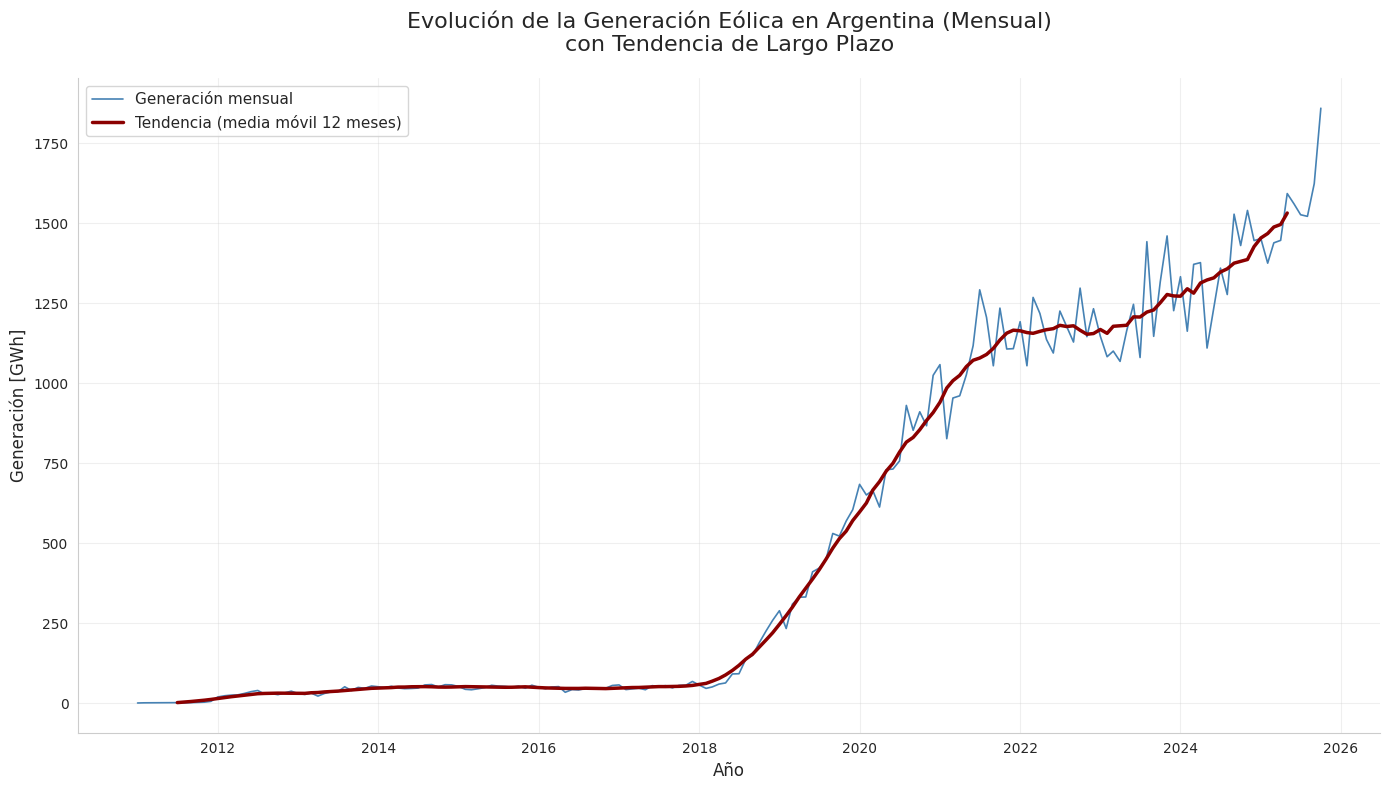


Generación por año:


,Generación Anual [GWh]
FECHA,
2011-12-31,15.98
2012-12-31,348.94
2013-12-31,446.99
2014-12-31,613.29
2015-12-31,592.97
2016-12-31,546.77
2017-12-31,615.81
2018-12-31,1413.14
2019-12-31,4995.82



Crecimiento interanual (%):


,Crecimiento Interanual (%)
FECHA,
2012-12-31,2083.60
2013-12-31,28.10
2014-12-31,37.20
2015-12-31,-3.31
2016-12-31,-7.79
2017-12-31,12.63
2018-12-31,129.48
2019-12-31,253.53
2020-12-31,88.37


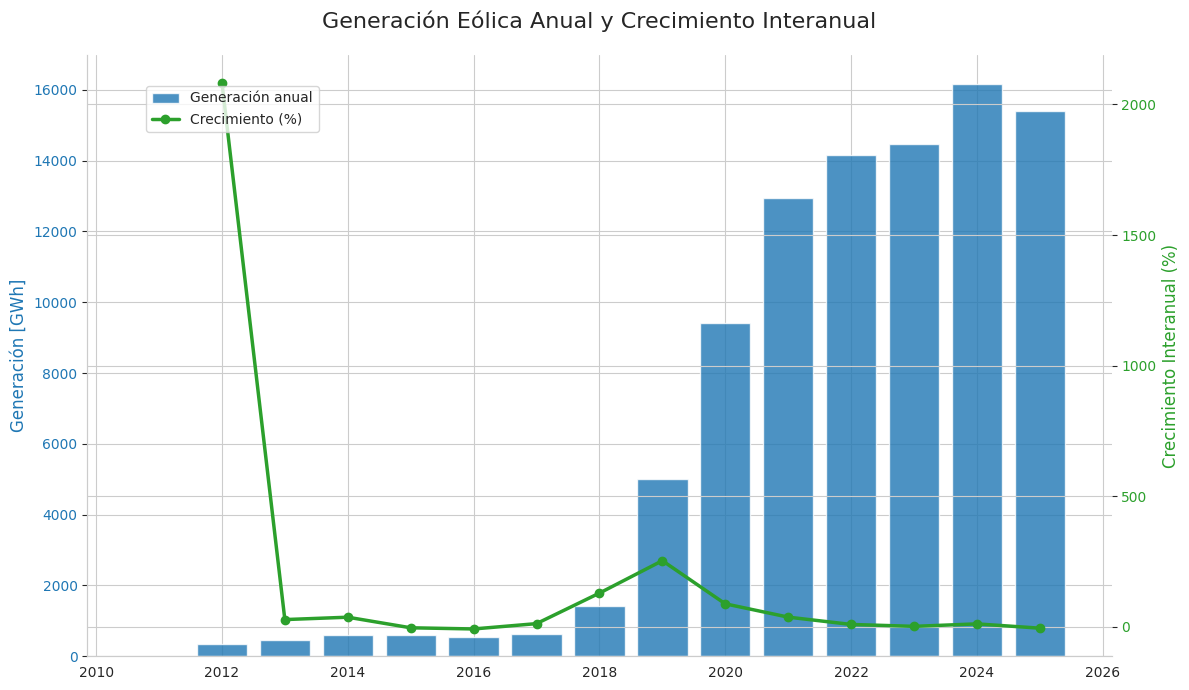

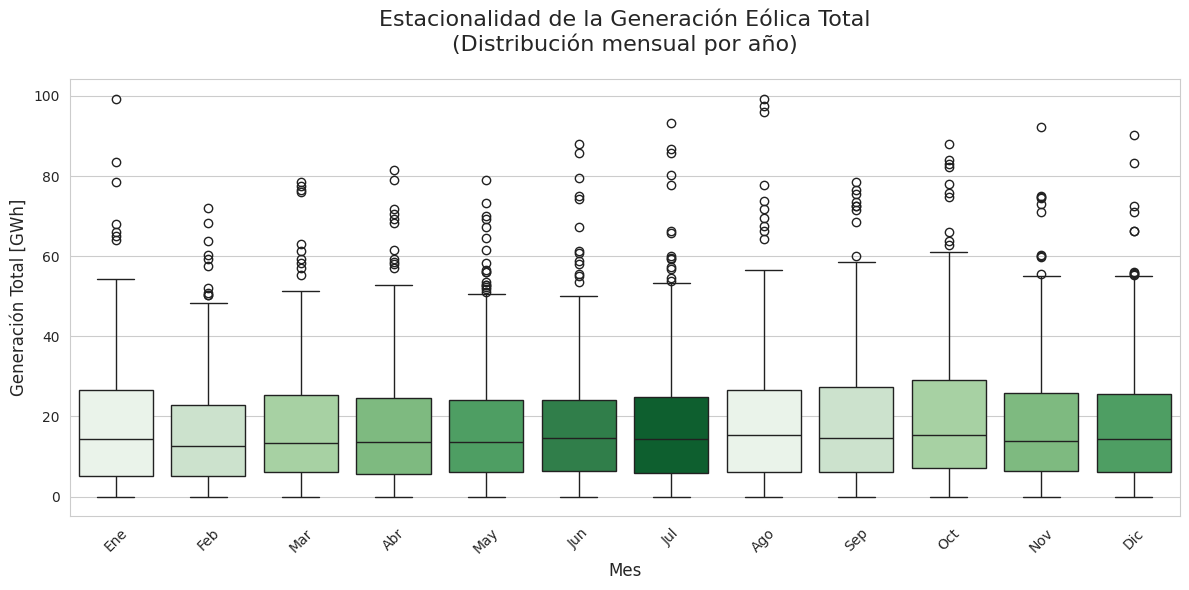

In [31]:
# =============================================================================
# 4.1 ANÁLISIS TEMPORAL
# =============================================================================

print("="*80)
print("ANÁLISIS TEMPORAL DE LA GENERACIÓN EÓLICA")
print("="*80)
print()

# Usamos el dataset limpio de la fase anterior
df = df_clean.copy()

# -----------------------------------------------------------------------------
# Agregación mensual (ya está a nivel mensual por central)
# -----------------------------------------------------------------------------
generacion_mensual = df.groupby('FECHA')['ENERGÍA GENERADA [GWh]'].sum().round(2)
# 1. df.groupby('FECHA') -  Agrupa todos los registros que tienen la misma fecha
# 2. ['ENERGÍA GENERADA [GWh]'] - Selecciona solo la columna de generación
# 3. .sum() - Suma la generación de todas las centrales en cada grupo
# 4. .round(2) - Redondea a 2 decimales (ej: 1234.5678 → 1234.57)

print("Serie mensual agregada creada")
print(f"Período: {generacion_mensual.index.min().strftime('%Y-%m')} → {generacion_mensual.index.max().strftime('%Y-%m')}") # Imprime el período analizado
print(f"Generación total: {generacion_mensual.sum():,.2f} GWh")
print() # Imprime la generación total de energía eólica en todo el período analizado

# -----------------------------------------------------------------------------
# Visualización 1: Evolución mensual + tendencia (media móvil 12 meses)
# -----------------------------------------------------------------------------
"""
Gráfico de línea que muestra:
1. Serie mensual real (con variaciones mes a mes)
2. Tendencia de largo plazo (media móvil para suavizar)

"""
plt.figure(figsize=(14, 8)) # plt.figure(): crea una nueva figura (lienzo) para el gráfico

# Serie mensual
plt.plot(generacion_mensual.index, generacion_mensual.values,
         label='Generación mensual', color='steelblue', linewidth=1.2)

# Media móvil 12 meses para suavizar y ver tendencia
generacion_mensual_ma = generacion_mensual.rolling(window=12, center=True).mean()
plt.plot(generacion_mensual_ma.index, generacion_mensual_ma.values,
         label='Tendencia (media móvil 12 meses)', color='darkred', linewidth=2.5)

plt.title('Evolución de la Generación Eólica en Argentina (Mensual)\ncon Tendencia de Largo Plazo',
          fontsize=16, pad=20)
plt.ylabel('Generación [GWh]', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Agregación anual y crecimiento interanual
# -----------------------------------------------------------------------------
"""
Convertimos la serie mensual a anual (suma de los 12 meses de cada año)
para analizar el crecimiento año contra año.
"""
generacion_anual = generacion_mensual.resample('Y').sum()
crecimiento_anual = generacion_anual.pct_change() * 100  # % de crecimiento vs año anterior

print("\nGeneración por año:")
display(generacion_anual.to_frame('Generación Anual [GWh]').round(2))

print("\nCrecimiento interanual (%):")
display(crecimiento_anual.round(2).to_frame('Crecimiento Interanual (%)').dropna())

# -----------------------------------------------------------------------------
# Visualización 2: Generación anual + crecimiento
# -----------------------------------------------------------------------------
"""
Gráfico con dos ejes Y:
- Eje izquierdo: barras de generación anual (GWh)
- Eje derecho: línea de crecimiento interanual (%)

"""

fig, ax1 = plt.subplots(figsize=(12, 7))

color1 = 'tab:blue'
ax1.bar(generacion_anual.index.year, generacion_anual.values, color=color1, alpha=0.8, label='Generación anual')
ax1.set_ylabel('Generación [GWh]', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title('Generación Eólica Anual y Crecimiento Interanual', fontsize=16, pad=20)

ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.plot(generacion_anual.index.year[1:], crecimiento_anual.values[1:],
         color=color2, marker='o', linewidth=2.5, label='Crecimiento (%)')
ax2.set_ylabel('Crecimiento Interanual (%)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.88))
sns.despine()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Visualización 3: Estacionalidad (boxplot mensual) - VERSIÓN CORREGIDA
# -----------------------------------------------------------------------------
"""
Boxplot para identificar patrones estacionales:
- ¿En qué meses se genera más energía?
- ¿Hay meses con mayor/menor variabilidad?
"""

# Mapeo manual de meses en español (100% portable, sin dependencias de locale)
meses_espanol = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

colores_eolica = ['#e8f5e9', '#c8e6c9', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c'] # Define la tableta de colores

df['MES_NOMBRE'] = df['FECHA'].dt.month.map(meses_espanol)

orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MES_NOMBRE', y='ENERGÍA GENERADA [GWh]', order=orden_meses,
            palette=colores_eolica)
plt.title('Estacionalidad de la Generación Eólica Total\n(Distribución mensual por año)', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Generación Total [GWh]', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=========================================================

Fase 4.2 Análisis Geográfico (Región y Provincia)

=========================================================

En esta sección exploramos la distribución territorial de la generación eólica:
- Ranking por provincia y región
- Participación relativa (% del total nacional)
- Identificación de concentración geográfica

Nota metodológica:
Las diferencias observadas en la generación acumulada por provincia reflejan tanto las condiciones naturales del recurso eólico como la distribución y escala de la potencia instalada. En las siguientes secciones se incorpora un análisis normalizado para profundizar esta interpretación.

ANÁLISIS GEOGRÁFICO DE LA GENERACIÓN EÓLICA

GENERACIÓN EÓLICA TOTAL ACUMULADA
Total nacional: 92,133.49 GWh
Período: 2011-01 → 2025-10
Número de provincias con generación eólica: 10



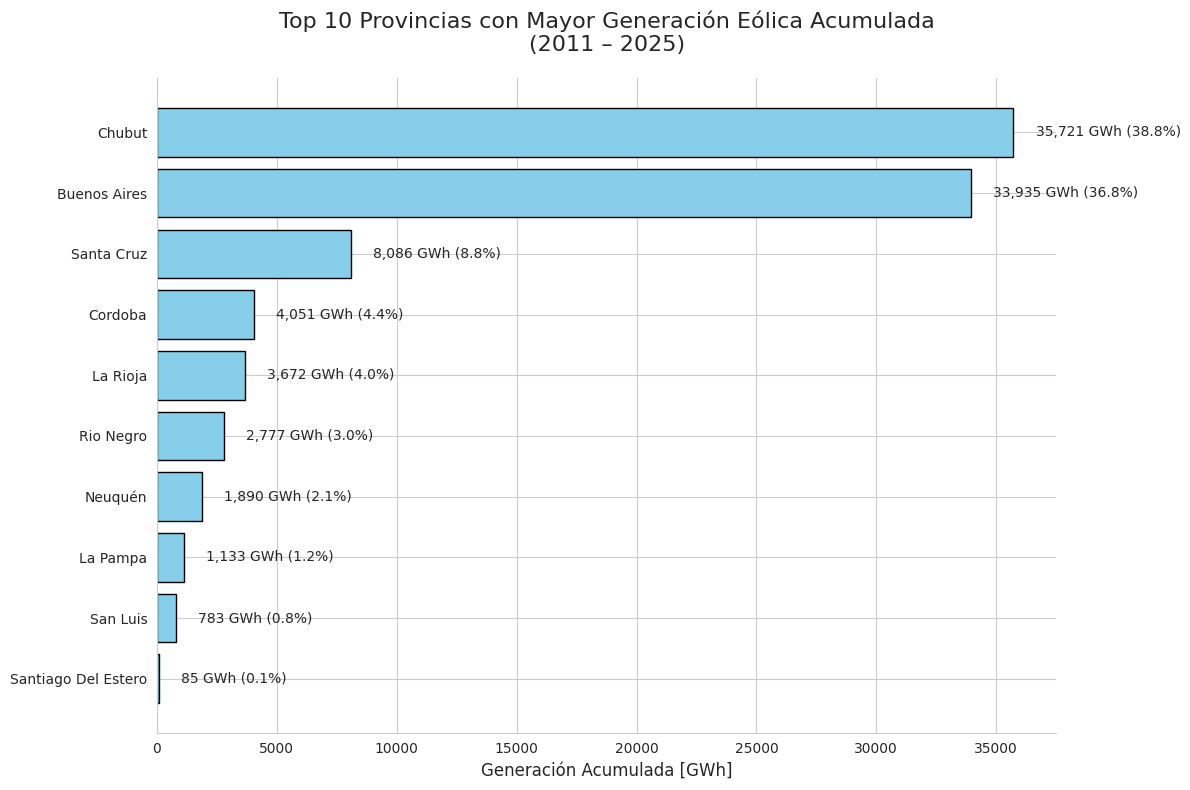

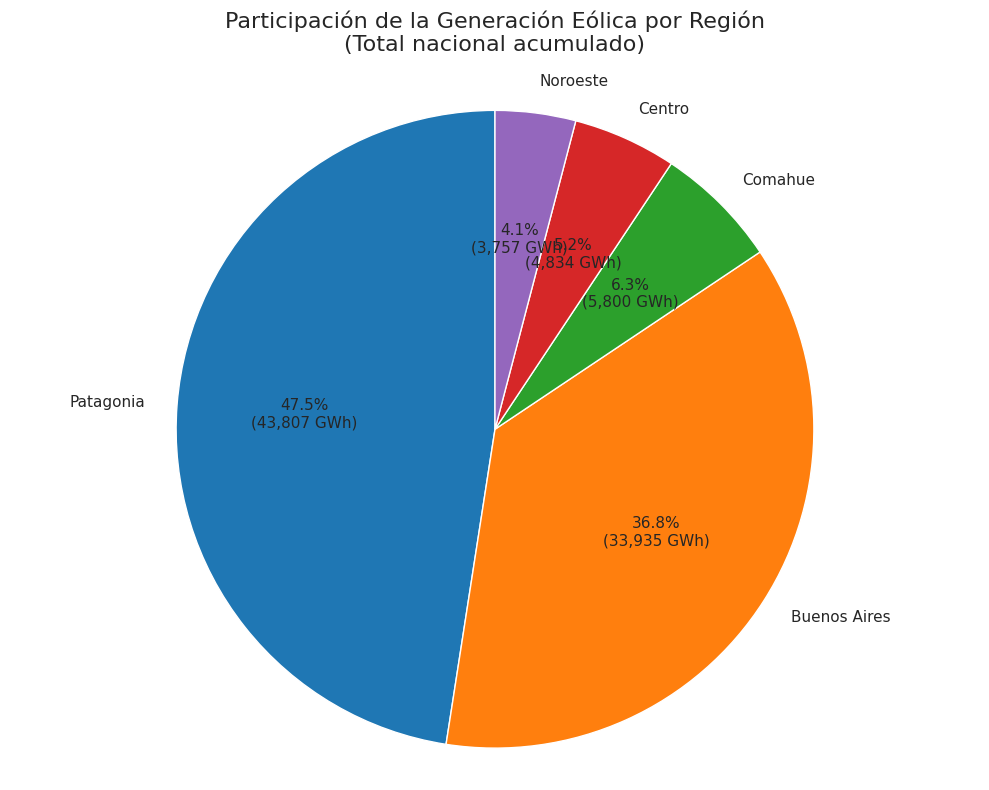

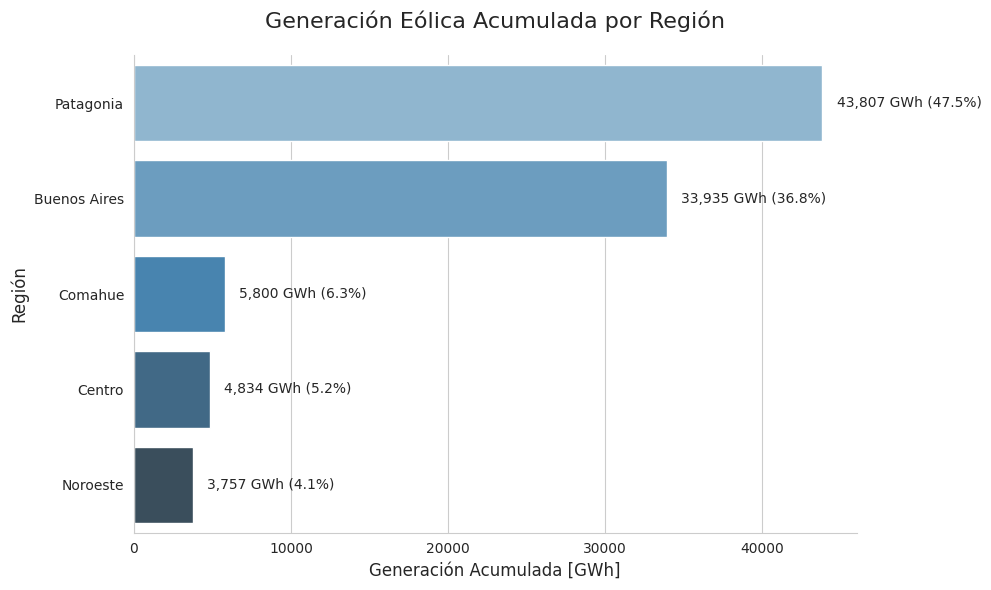


RANKING COMPLETO POR PROVINCIA


,Generación Acumulada [GWh],Participación
PROVINCIA,,
Chubut,35721.16,38.77%
Buenos Aires,33935.27,36.83%
Santa Cruz,8085.77,8.78%
Cordoba,4051.47,4.4%
La Rioja,3672.34,3.99%
Rio Negro,2777.30,3.01%
Neuquén,1889.88,2.05%
La Pampa,1132.61,1.23%
San Luis,782.80,0.85%



RANKING POR REGIÓN


,Generación Acumulada [GWh],Participación
REGIÓN,,
Patagonia,43806.93,47.55%
Buenos Aires,33935.27,36.83%
Comahue,5799.79,6.29%
Centro,4834.27,5.25%
Noroeste,3757.23,4.08%


In [32]:
# =============================================================================
# 4.2 ANÁLISIS POR REGIÓN Y PROVINCIA
# =============================================================================

print("="*80)
print("ANÁLISIS GEOGRÁFICO DE LA GENERACIÓN EÓLICA")
print("="*80)
print()

# Usamos el dataset limpio
df = df_clean.copy()

col_generacion = 'ENERGÍA GENERADA [GWh]'

# -----------------------------------------------------------------------------
# Generación total acumulada por provincia y región
# -----------------------------------------------------------------------------
generacion_provincia = df.groupby('PROVINCIA')[col_generacion].sum().round(2)
generacion_provincia = generacion_provincia.sort_values(ascending=False)

generacion_region = df.groupby('REGIÓN')[col_generacion].sum().round(2)
generacion_region = generacion_region.sort_values(ascending=False)

total_nacional = generacion_provincia.sum()

print("GENERACIÓN EÓLICA TOTAL ACUMULADA")
print(f"Total nacional: {total_nacional:,.2f} GWh")
print(f"Período: {df['FECHA'].min().strftime('%Y-%m')} → {df['FECHA'].max().strftime('%Y-%m')}")
print(f"Número de provincias con generación eólica: {generacion_provincia.shape[0]}")
print()

# -----------------------------------------------------------------------------
# Visualización 1: Top 10 provincias (barra horizontal)
# -----------------------------------------------------------------------------
"""
Gráfico de barras horizontales mostrando las 10 provincias con mayor generación.
Incluye valores absolutos (GWh) y porcentajes del total nacional.
"""

top_n = 10
plt.figure(figsize=(12, 8))

bars = plt.barh(generacion_provincia.index[:top_n][::-1],
                generacion_provincia.values[:top_n][::-1],
                color='skyblue', edgecolor='black')

# Agregar valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + total_nacional*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f} GWh ({width/total_nacional*100:.1f}%)',
             va='center', fontsize=10)

plt.title(f'Top {top_n} Provincias con Mayor Generación Eólica Acumulada\n'
          f'({df["FECHA"].min().year} – {df["FECHA"].max().year})',
          fontsize=16, pad=20)
plt.xlabel('Generación Acumulada [GWh]')
plt.tight_layout()
sns.despine()
plt.show()

# -----------------------------------------------------------------------------
# Visualización 2: Participación por región (gráfico de torta)
# -----------------------------------------------------------------------------
"""
Gráfico circular (pie chart) mostrando la participación porcentual
de cada región en la generación total nacional.

"""

plt.figure(figsize=(10, 8))

# Colores personalizados para destacar Patagonia
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

wedges, texts, autotexts = plt.pie(generacion_region.values,
                                  labels=generacion_region.index,
                                  autopct=lambda pct: f'{pct:.1f}%\n({pct/100*total_nacional:,.0f} GWh)',
                                  colors=colores,
                                  startangle=90,
                                  textprops={'fontsize': 11})

plt.title('Participación de la Generación Eólica por Región\n'
          '(Total nacional acumulado)', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Visualización 3: Ranking de regiones (barra simple)
# -----------------------------------------------------------------------------
"""
Alternativa al gráfico de torta: barras horizontales por región.
Facilita la comparación precisa de valores.
"""

plt.figure(figsize=(10, 6))
sns.barplot(x=generacion_region.values, y=generacion_region.index,
            palette='Blues_d')
plt.title('Generación Eólica Acumulada por Región', fontsize=16, pad=20)
plt.xlabel('Generación Acumulada [GWh]')
plt.ylabel('Región')

# Agregar valores
for i, v in enumerate(generacion_region.values):
    plt.text(v + total_nacional*0.01, i, f'{v:,.0f} GWh ({v/total_nacional*100:.1f}%)',
             va='center')

sns.despine()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Tablas resumen
# -----------------------------------------------------------------------------
print("\nRANKING COMPLETO POR PROVINCIA")
display(generacion_provincia.to_frame('Generación Acumulada [GWh]').assign(
    Participación = lambda x: (x['Generación Acumulada [GWh]'] / total_nacional * 100).round(2).astype(str) + '%'
))

print("\nRANKING POR REGIÓN")
display(generacion_region.to_frame('Generación Acumulada [GWh]').assign(
    Participación = lambda x: (x['Generación Acumulada [GWh]'] / total_nacional * 100).round(2).astype(str) + '%'
))


=========================================================

Fase 4.3 Análisis por Central Eólica

=========================================================

En esta sección analizamos el desempeño individual de los parques eólicos:
- Ranking de centrales por generación acumulada
- Concentración de la producción (efecto Pareto)
- Identificación de los activos más estratégicos

ANÁLISIS POR CENTRAL EÓLICA

RESUMEN GENERAL POR CENTRAL
Total de centrales eólicas en el dataset: 71
Generación total nacional: 92,133.48 GWh
Generación media por central: 1,298 GWh



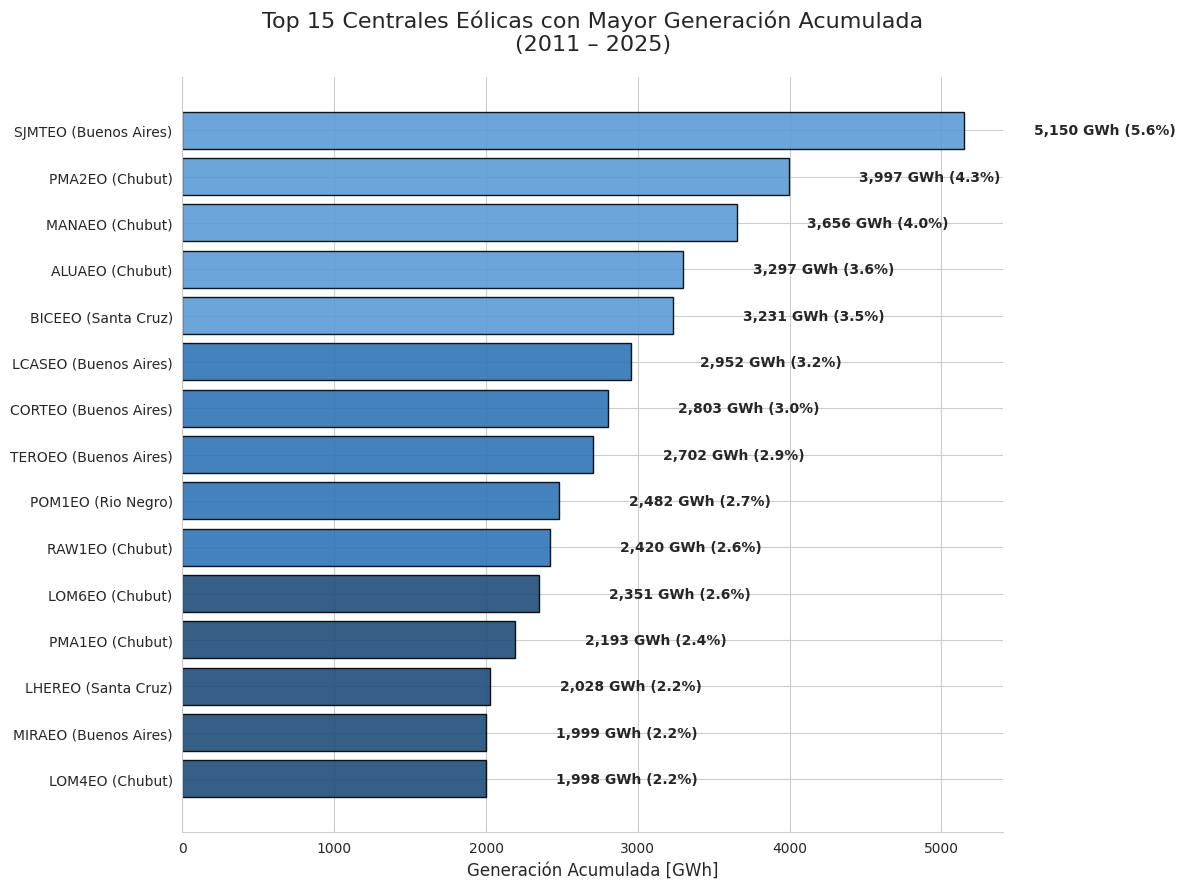

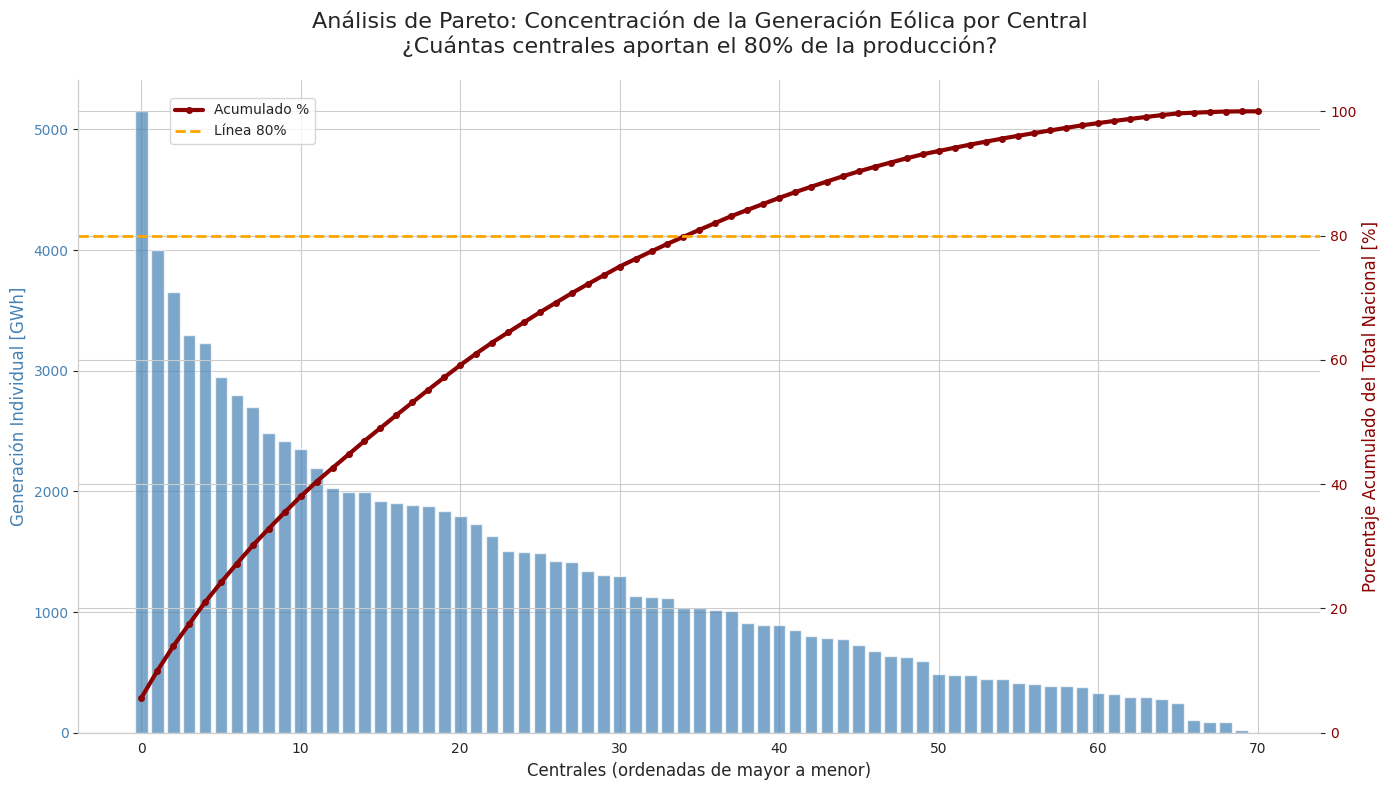


INDICADORES DE CONCENTRACIÓN
Las top 5 centrales aportan el 21.0% del total nacional
Las top 10 centrales aportan el 35.5% del total nacional
Se necesita 36 centrales para alcanzar el 80% de la generación total

TABLA: Top 15 Centrales Eólicas


,Central,Generación [GWh],Participación %,Acumulado %
0,SJMTEO,5150.42,5.59,5.590172
1,PMA2EO,3997.34,4.34,9.928812
2,MANAEO,3655.74,3.97,13.896686
3,ALUAEO,3296.86,3.58,17.475037
4,BICEEO,3230.74,3.51,20.981624
5,LCASEO,2952.16,3.20,24.185844
6,CORTEO,2802.99,3.04,27.228159
7,TEROEO,2701.98,2.93,30.160838
8,POM1EO,2481.99,2.69,32.854745
9,RAW1EO,2420.12,2.63,35.481499



ANÁLISIS POR CENTRAL COMPLETADO


In [33]:
# =============================================================================
# 4.3 ANÁLISIS POR CENTRAL EÓLICA
# =============================================================================

print("="*80)
print("ANÁLISIS POR CENTRAL EÓLICA")
print("="*80)
print()

# Usamos el dataset limpio
df = df_clean.copy() # Trabajamos con una copia del dataset limpio (Fase 3)

col_generacion = 'ENERGÍA GENERADA [GWh]'
col_central = 'CENTRAL'
# Guardamos el nombre de la columna en una variable
# Si el nombre cambia, solo lo modificamos aquí

# -----------------------------------------------------------------------------
# Generación total acumulada por central
# -----------------------------------------------------------------------------

generacion_central = df.groupby(col_central)[col_generacion].sum().round(2)
generacion_central = generacion_central.sort_values(ascending=False)

total_nacional = generacion_central.sum()
n_centrales = generacion_central.shape[0]

print("RESUMEN GENERAL POR CENTRAL")
print(f"Total de centrales eólicas en el dataset: {n_centrales}")
print(f"Generación total nacional: {total_nacional:,.2f} GWh")
print(f"Generación media por central: {total_nacional/n_centrales:,.0f} GWh")
print()

# -----------------------------------------------------------------------------
# Visualización 1: Top 15 centrales (barra horizontal)
# -----------------------------------------------------------------------------

top_n = 15

# Crear mapping CENTRAL → PROVINCIA
central_provincia = (
    df[['CENTRAL', 'PROVINCIA']]
    .drop_duplicates()
    .set_index('CENTRAL')['PROVINCIA']
    .to_dict()
)

# Etiquetas del eje Y: CENTRAL (Provincia)
labels_y = [
    f"{central} ({central_provincia.get(central, '')})"
    for central in generacion_central.index[:top_n][::-1]
]

plt.figure(figsize=(12, 9))

# Colores: top 5 más oscuras para destacar
colores = ['#1f4e79']*5 + ['#2e75b6']*5 + ['#5b9bd5']*5

bars = plt.barh(
    labels_y,
    generacion_central.values[:top_n][::-1],
    color=colores,
    edgecolor='black',
    alpha=0.9
)

# Valores y porcentaje en las barras
for bar in bars:
    width = bar.get_width()
    porcentaje = width / total_nacional * 100
    plt.text(
        width + total_nacional * 0.005,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f} GWh ({porcentaje:.1f}%)',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title(
    f'Top {top_n} Centrales Eólicas con Mayor Generación Acumulada\n'
    f'({df["FECHA"].min().year} – {df["FECHA"].max().year})',
    fontsize=16,
    pad=20
)

plt.xlabel('Generación Acumulada [GWh]')
plt.tight_layout()
sns.despine()
plt.show()

# -----------------------------------------------------------------------------
# Visualización 2: Gráfico de Pareto (acumulado)
# -----------------------------------------------------------------------------

# Ordenar de mayor a menor y calcular acumulado
pareto_df = pd.DataFrame({
    'Central': generacion_central.index,
    'Generación': generacion_central.values
}).reset_index(drop=True)

pareto_df['Acumulado'] = pareto_df['Generación'].cumsum()
pareto_df['Porcentaje_Acumulado'] = pareto_df['Acumulado'] / total_nacional * 100

fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras individuales
ax1.bar(range(len(pareto_df)), pareto_df['Generación'], color='steelblue', alpha=0.7)
ax1.set_ylabel('Generación Individual [GWh]', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xlabel('Centrales (ordenadas de mayor a menor)')

# Línea acumulada
ax2 = ax1.twinx()
ax2.plot(range(len(pareto_df)), pareto_df['Porcentaje_Acumulado'],
         color='darkred', marker='o', linewidth=3, markersize=4, label='Acumulado %')
ax2.set_ylabel('Porcentaje Acumulado del Total Nacional [%]', color='darkred', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0, 105)
ax2.axhline(y=80, color='orange', linestyle='--', linewidth=2, label='Línea 80%')

plt.title('Análisis de Pareto: Concentración de la Generación Eólica por Central\n'
          '¿Cuántas centrales aportan el 80% de la producción?',
          fontsize=16, pad=20)

fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.88))
sns.despine()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Métricas de concentración
# -----------------------------------------------------------------------------
top_5_pct = pareto_df.iloc[:5]['Porcentaje_Acumulado'].max()
top_10_pct = pareto_df.iloc[:10]['Porcentaje_Acumulado'].max()
n_para_80 = pareto_df[pareto_df['Porcentaje_Acumulado'] >= 80].index[0] + 1

print("\nINDICADORES DE CONCENTRACIÓN")
print(f"Las top 5 centrales aportan el {top_5_pct:.1f}% del total nacional")
print(f"Las top 10 centrales aportan el {top_10_pct:.1f}% del total nacional")
print(f"Se necesita {n_para_80} centrales para alcanzar el 80% de la generación total")
print()

# -----------------------------------------------------------------------------
# Tabla resumen Top 15
# -----------------------------------------------------------------------------
tabla_top = pareto_df.head(15).copy()
tabla_top['Participación %'] = (tabla_top['Generación'] / total_nacional * 100).round(2)
tabla_top = tabla_top[['Central', 'Generación', 'Participación %', 'Porcentaje_Acumulado']]

print("TABLA: Top 15 Centrales Eólicas")
display(tabla_top.rename(columns={
    'Generación': 'Generación [GWh]',
    'Porcentaje_Acumulado': 'Acumulado %'
}))

print("\n" + "="*80)
print("ANÁLISIS POR CENTRAL COMPLETADO")
print("="*80)

#=========================================================
#FASE 5. VISUALIZACIONES EXTRAS
#=========================================================

### Objetivo:
Explorar relaciones entre variables y patrones no evidentes en el análisis univariado previo.

### Análisis Incluidos:

#### 5.1 **Relación Mes × Provincia (Heatmap)**
   - ¿Qué provincias generan más en qué meses?
   - Identificar patrones estacionales diferenciados

#### 5.2 **Evolución por Provincia (Serie Temporal Comparativa)**
   - ¿Todas las provincias crecen al mismo ritmo?
   - Identificar líderes y rezagados

#### 5.3 **Variabilidad vs Producción (Scatter Plot)**
   - ¿Las centrales grandes son más o menos consistentes?
   - Coeficiente de Variación vs Generación Media

#### 5.4 **Distribución de la Generación (Histograma + KDE)**
   - ¿Cómo se distribuye la generación mensual?
   - ¿Hay meses "típicos" o mucha dispersión?

#### 5.5 **Correlación entre Variables (Matrix de Correlación)**
   - Relaciones entre generación, mes, año, provincia
   - Identificar patrones ocultos

5.1 RELACIÓN MES × PROVINCIA



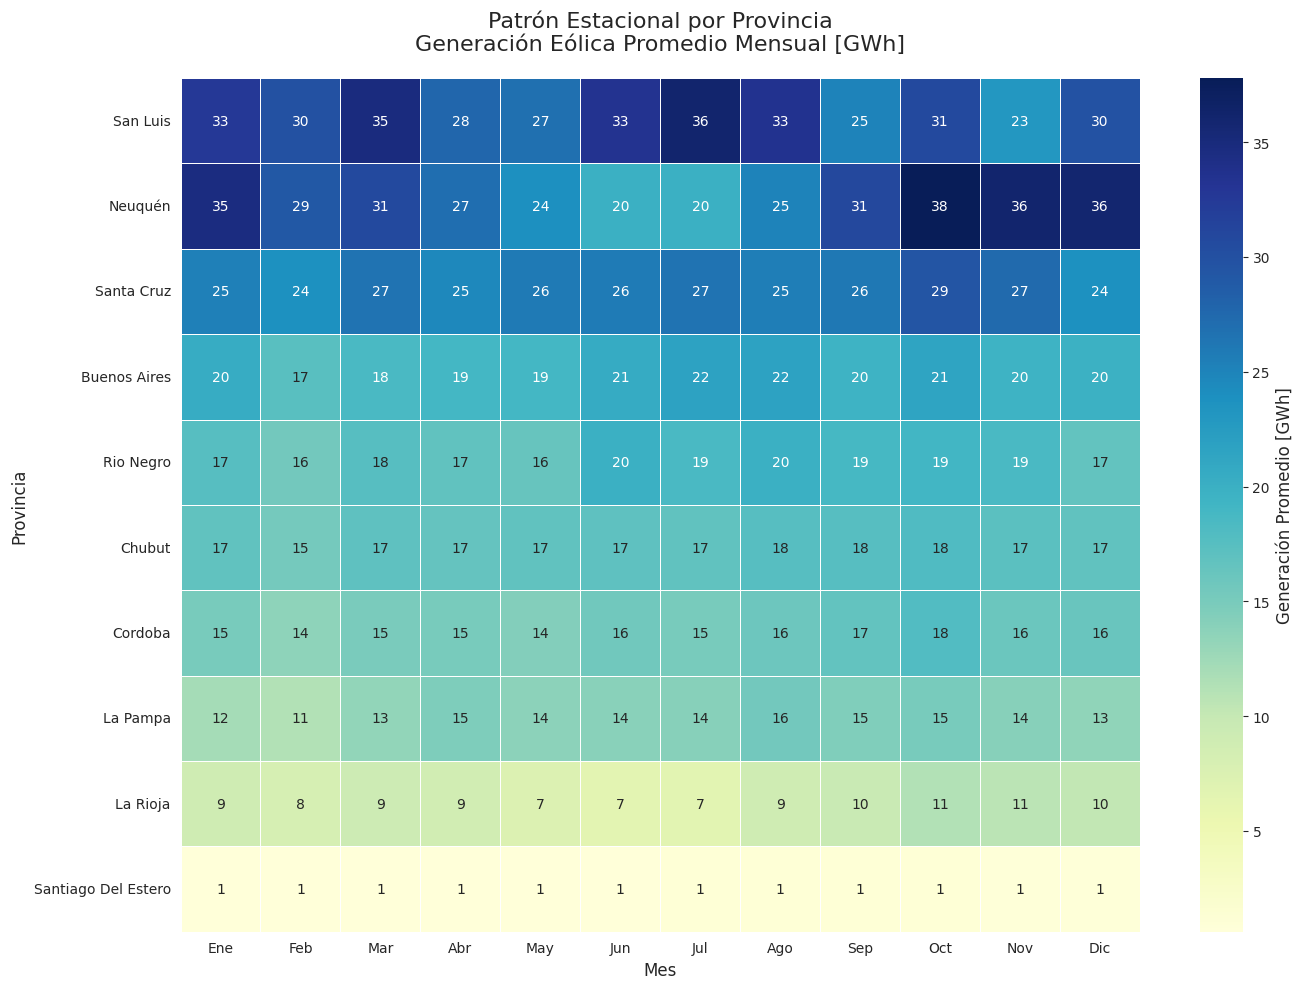

INTERPRETACIÓN:
- Celdas más oscuras: meses de mayor generación para esa provincia
- Permite identificar si todas las provincias tienen el mismo pico estacional



In [34]:
# =============================================================================
# 5.1 HEATMAP: GENERACIÓN PROMEDIO POR MES Y PROVINCIA
# =============================================================================
"""
OBJETIVO: Identificar patrones estacionales diferenciados por provincia.
¿Todas las provincias tienen el mismo patrón estacional o hay diferencias?
"""

print("="*80)
print("5.1 RELACIÓN MES × PROVINCIA")
print("="*80)
print()

# Crear tabla pivote: Provincia × Mes (promedio de generación)
pivot_prov_mes = df.pivot_table(
    values=col_generacion,
    index='PROVINCIA',
    columns='MES_NUM',
    aggfunc='mean'  # Promedio mensual por provincia
).round(2)

# Renombrar columnas con nombres de meses
pivot_prov_mes.columns = [meses_espanol[i] for i in pivot_prov_mes.columns]

# Ordenar provincias por generación total
pivot_prov_mes = pivot_prov_mes.loc[
    pivot_prov_mes.sum(axis=1).sort_values(ascending=False).index
]

# Visualización
plt.figure(figsize=(14, 10))

sns.heatmap(pivot_prov_mes,
            annot=True,           # Mostrar valores en las celdas
            fmt='.0f',            # Formato sin decimales
            cmap='YlGnBu',        # Paleta amarillo-verde-azul
            cbar_kws={'label': 'Generación Promedio [GWh]'},
            linewidths=0.5)

plt.title('Patrón Estacional por Provincia\n'
          'Generación Eólica Promedio Mensual [GWh]',
          fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.tight_layout()
plt.show()

print("INTERPRETACIÓN:")
print("- Celdas más oscuras: meses de mayor generación para esa provincia")
print("- Permite identificar si todas las provincias tienen el mismo pico estacional")
print()

5.2 EVOLUCIÓN TEMPORAL POR PROVINCIA



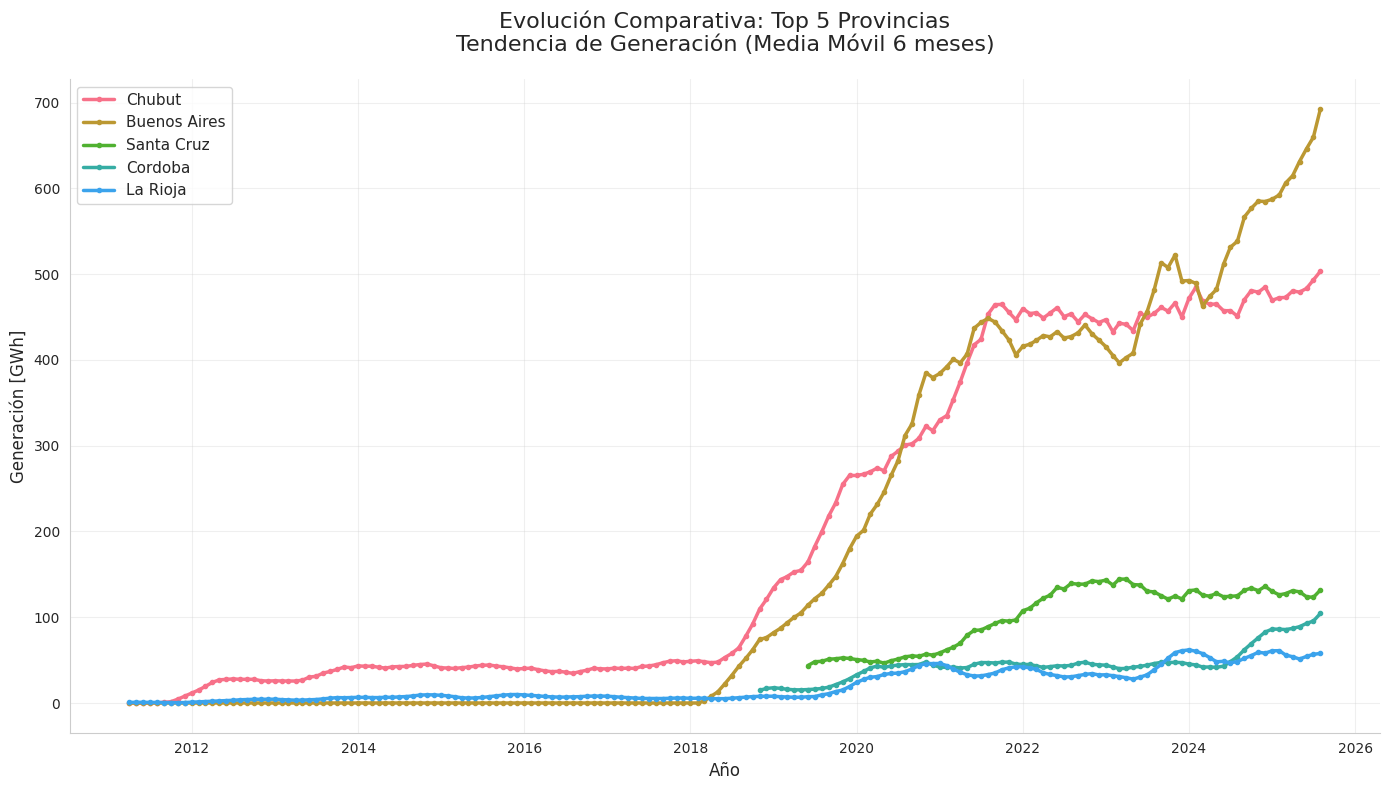

INTERPRETACIÓN:
- Líneas con mayor pendiente: provincias con crecimiento acelerado
- Líneas planas: estancamiento o capacidad saturada



In [35]:
# =============================================================================
# 5.2 EVOLUCIÓN TEMPORAL COMPARATIVA (TOP 5 PROVINCIAS)
# =============================================================================
"""
OBJETIVO: Comparar trayectorias de crecimiento entre provincias.
¿Todas crecen al mismo ritmo o algunas aceleran/desaceleran?
"""

print("="*80)
print("5.2 EVOLUCIÓN TEMPORAL POR PROVINCIA")
print("="*80)
print()

# Identificar Top 5 provincias por generación total
top5_provincias = df.groupby('PROVINCIA')[col_generacion].sum().nlargest(5).index

# Crear serie temporal para cada provincia
plt.figure(figsize=(14, 8))

for provincia in top5_provincias:
    df_prov = df[df['PROVINCIA'] == provincia]
    gen_mensual_prov = df_prov.groupby('FECHA')[col_generacion].sum()

    # Media móvil 6 meses para suavizar
    gen_ma_prov = gen_mensual_prov.rolling(window=6, center=True).mean()

    plt.plot(gen_ma_prov.index, gen_ma_prov.values,
             linewidth=2.5, label=provincia, marker='o', markersize=3)

plt.title('Evolución Comparativa: Top 5 Provincias\n'
          'Tendencia de Generación (Media Móvil 6 meses)',
          fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Generación [GWh]', fontsize=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

print("INTERPRETACIÓN:")
print("- Líneas con mayor pendiente: provincias con crecimiento acelerado")
print("- Líneas planas: estancamiento o capacidad saturada")
print()

5.3 VARIABILIDAD VS PRODUCCIÓN



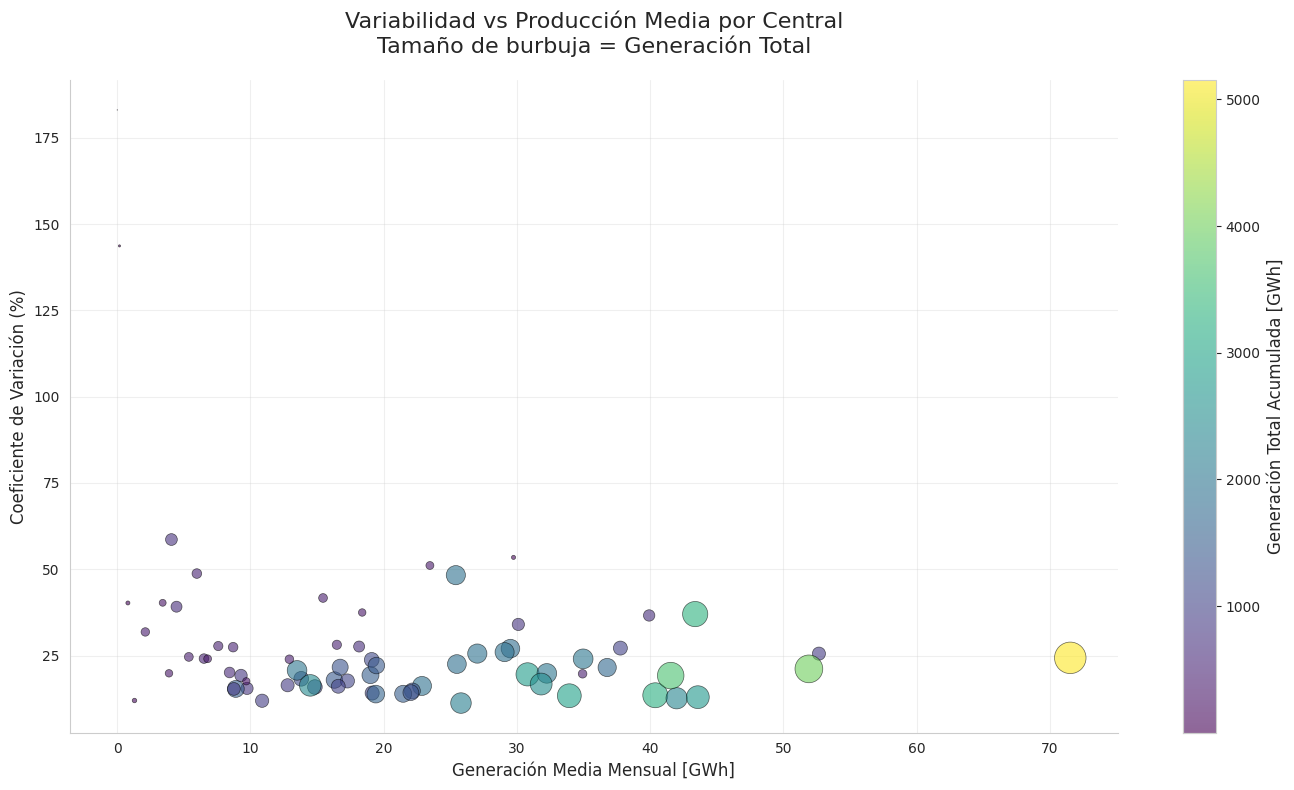

INTERPRETACIÓN:
- Esquina inferior derecha: centrales grandes y consistentes (ideal)
- Esquina superior derecha: centrales grandes pero volátiles
- Esquina superior izquierda: centrales pequeñas y errá ticas



In [36]:
# =============================================================================
# 5.3 ANÁLISIS DE VARIABILIDAD: CONSISTENCIA VS PRODUCCIÓN
# =============================================================================
"""
OBJETIVO: Identificar centrales consistentes vs volátiles.
Coeficiente de Variación (CV) = desviación estándar / media
CV bajo = generación estable, CV alto = generación errática
"""

print("="*80)
print("5.3 VARIABILIDAD VS PRODUCCIÓN")
print("="*80)
print()

# Calcular estadísticas por central
stats_central = df.groupby('CENTRAL')[col_generacion].agg([
    ('Media', 'mean'),
    ('Desv_Std', 'std'),
    ('Total', 'sum')
]).reset_index()

# Calcular Coeficiente de Variación
stats_central['CV'] = (stats_central['Desv_Std'] / stats_central['Media']) * 100

# Visualización
plt.figure(figsize=(14, 8))

scatter = plt.scatter(stats_central['Media'],
                     stats_central['CV'],
                     s=stats_central['Total']/10,  # Tamaño proporcional a producción total
                     alpha=0.6,
                     c=stats_central['Total'],
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

plt.colorbar(scatter, label='Generación Total Acumulada [GWh]')

plt.title('Variabilidad vs Producción Media por Central\n'
          'Tamaño de burbuja = Generación Total',
          fontsize=16, pad=20)
plt.xlabel('Generación Media Mensual [GWh]', fontsize=12)
plt.ylabel('Coeficiente de Variación (%)', fontsize=12)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

print("INTERPRETACIÓN:")
print("- Esquina inferior derecha: centrales grandes y consistentes (ideal)")
print("- Esquina superior derecha: centrales grandes pero volátiles")
print("- Esquina superior izquierda: centrales pequeñas y errá ticas")
print()


5.4 DISTRIBUCIÓN DE LA GENERACIÓN



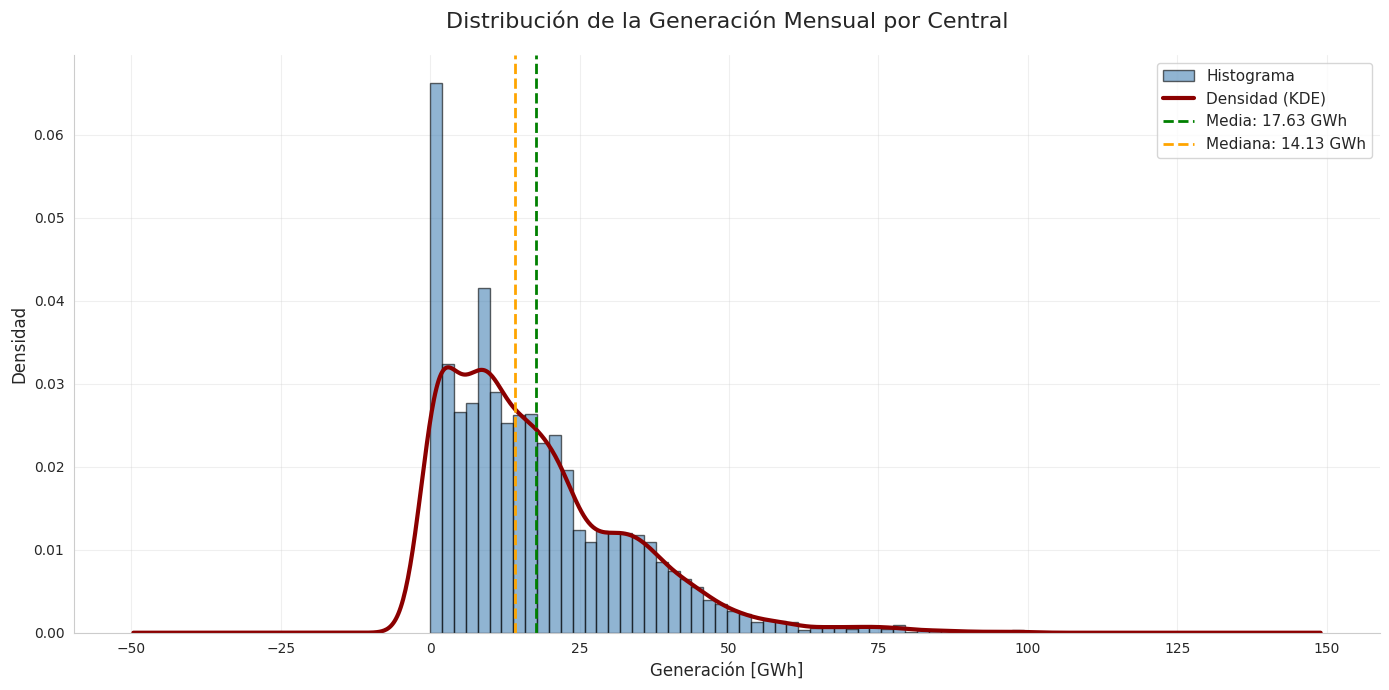

INTERPRETACIÓN:
- Media: 17.63 GWh | Mediana: 14.13 GWh
- Distribución sesgada a la derecha (pocas centrales muy grandes)



In [37]:
# =============================================================================
# 5.4 DISTRIBUCIÓN DE LA GENERACIÓN MENSUAL
# =============================================================================
"""
OBJETIVO: Entender la forma de la distribución de generación.
¿Es normal? ¿Sesgada? ¿Bimodal?
"""

print("="*80)
print("5.4 DISTRIBUCIÓN DE LA GENERACIÓN")
print("="*80)
print()

plt.figure(figsize=(14, 7))

# Histograma + KDE
plt.hist(df[col_generacion], bins=50,
         color='steelblue', alpha=0.6,
         edgecolor='black', density=True,
         label='Histograma')

# Curva de densidad
from scipy import stats
df[col_generacion].plot(kind='kde', color='darkred',
                        linewidth=3, label='Densidad (KDE)')

# Líneas de referencia
media = df[col_generacion].mean()
mediana = df[col_generacion].median()

plt.axvline(media, color='green', linestyle='--',
            linewidth=2, label=f'Media: {media:.2f} GWh')
plt.axvline(mediana, color='orange', linestyle='--',
            linewidth=2, label=f'Mediana: {mediana:.2f} GWh')

plt.title('Distribución de la Generación Mensual por Central',
          fontsize=16, pad=20)
plt.xlabel('Generación [GWh]', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

print("INTERPRETACIÓN:")
print(f"- Media: {media:.2f} GWh | Mediana: {mediana:.2f} GWh")
if media > mediana * 1.1:
    print("- Distribución sesgada a la derecha (pocas centrales muy grandes)")
else:
    print("- Distribución relativamente simétrica")
print()

5.5 CORRELACIÓN ENTRE VARIABLES

Matriz de correlación:


,ENERGÍA GENERADA [GWh],MES_NUM,AÑO
ENERGÍA GENERADA [GWh],1.000,0.036,0.297
MES_NUM,0.036,1.000,-0.068
AÑO,0.297,-0.068,1.000


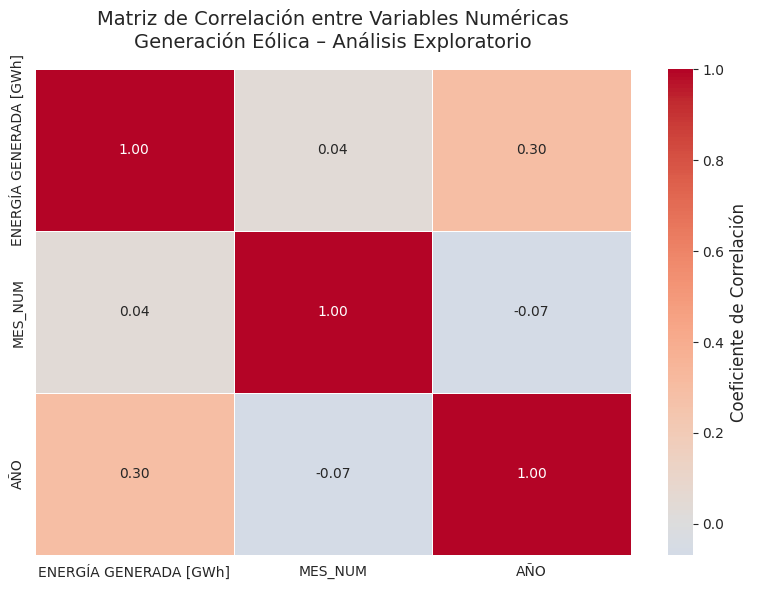

INTERPRETACIÓN:
- Correlación con AÑO: indica crecimiento estructural del sector
- Correlación con MES: refleja estacionalidad
- Valores cercanos a 0 indican baja relación lineal



In [38]:
# =============================================================================
# 5.5 MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# =============================================================================
"""
OBJETIVO:
Explorar relaciones lineales entre variables numéricas clave del dataset.

IMPORTANTE:
- La correlación NO implica causalidad
- No se incluyen variables categóricas (Provincia / Región)
- El análisis es exploratorio
"""

print("="*80)
print("5.5 CORRELACIÓN ENTRE VARIABLES")
print("="*80)
print()

# Seleccionar solo variables numéricas relevantes
vars_corr = df[[
    'ENERGÍA GENERADA [GWh]',
    'MES_NUM',
    'AÑO'
]].copy()

# Calcular matriz de correlación (Pearson)
corr_matrix = vars_corr.corr()

print("Matriz de correlación:")
display(corr_matrix.round(3))

# Visualización: Heatmap de correlación
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar_kws={"label": "Coeficiente de Correlación"})

plt.title("Matriz de Correlación entre Variables Numéricas\n"
          "Generación Eólica – Análisis Exploratorio",
          fontsize=14, pad=15)

plt.tight_layout()
plt.show()

print("INTERPRETACIÓN:")
print("- Correlación con AÑO: indica crecimiento estructural del sector")
print("- Correlación con MES: refleja estacionalidad")
print("- Valores cercanos a 0 indican baja relación lineal")
print()


#==============================================
#FASE 6. CONCLUSIONES FINALES
#===============================================

### 1. Evolución temporal de la generación eólica en Argentina

El análisis de la serie temporal evidencia un **crecimiento estructural muy marcado** de la generación eólica en Argentina durante el período **2011–2025**.

- La generación anual pasó de valores marginales en los primeros años (**≈16 GWh en 2011**) a superar los **15.000 GWh anuales** a partir de 2023, alcanzando un máximo de **16.164 GWh en 2024**.
- Los mayores saltos de crecimiento interanual se observan a partir de **2018**, con incrementos **superiores al 100%** en varios años consecutivos (2018–2020), coincidiendo con la incorporación masiva de nuevas centrales al sistema.
- En los años más recientes se observa una **desaceleración del crecimiento**, e incluso leves caídas interanuales (2025), lo cual sugiere una **etapa de maduración** del parque eólico instalado más que una retracción estructural.
- La correlación positiva moderada entre energía generada y año (**ρ ≈ 0,30**) refuerza esta lectura: el crecimiento responde principalmente a la **expansión de capacidad instalada** en el tiempo, más que a variaciones operativas puntuales.

### 2. Estacionalidad de la generación eólica

El análisis mensual muestra un **patrón estacional claro pero no extremo**.

- La generación promedio mensual se concentra levemente en los **meses de invierno y primavera**, con **junio, julio y agosto** entre los meses de mayor producción promedio.
- Los valores más bajos se observan hacia **fines del verano**.
- Sin embargo, la correlación entre energía generada y mes es **prácticamente nula** (**ρ ≈ 0,04**), lo que indica que la estacionalidad, si bien visible en distribuciones y boxplots, **no explica por sí sola la variabilidad total** de la generación.
- Esto sugiere que la producción mensual está fuertemente condicionada por **factores estructurales** (cantidad y tamaño de centrales) más que por el calendario en sí.

### 3. Distribución geográfica de la generación

La generación eólica presenta una **alta concentración territorial**:

- **Chubut (38,8%)**, **Buenos Aires (36,8%)** y **Santa Cruz (8,8%)** explican en conjunto **más del 84%** de la generación eólica nacional.
- A nivel regional, la **Patagonia** concentra el **47,6%** del total generado, seguida por la región de **Buenos Aires** con el **36,8%**.

Este patrón confirma el **rol dominante** de la Patagonia y el sur bonaerense dentro de la matriz eólica nacional.  
No obstante, la presencia de provincias con generación significativamente menor (por ejemplo, San Luis o Santiago del Estero) **no puede interpretarse directamente como una menor calidad del recurso eólico**, sino que refleja principalmente una **menor cantidad y escala de centrales instaladas**.

### 4. Análisis por centrales: concentración y desempeño

El análisis a nivel de central permite profundizar la interpretación:

- El sistema cuenta con **71 centrales eólicas**, con una generación media aproximada de **1.300 GWh por central**.
- Existe una **alta concentración** de la producción:
  - Las **5 centrales principales** aportan el **21%** del total nacional.
  - Las **10 principales** explican el **35,5%**.
  - Se requieren **36 centrales** para alcanzar el **80%** de la generación acumulada.

Este comportamiento **tipo Pareto** evidencia que el desempeño del sistema está fuertemente influenciado por un **subconjunto de centrales de gran escala**.

El análisis de variabilidad (coeficiente de variación) muestra además la coexistencia de:
- Centrales con **alta generación y baja variabilidad** → producción más estable.
- Centrales de **gran producción pero mayor volatilidad** → posiblemente más expuestas a variaciones locales de viento o estrategias operativas específicas.

### 5. Forma de la distribución de la generación

La distribución de la generación mensual por central es **asimétrica y sesgada a la derecha**:

- **Media**: 17,6 GWh
- **Mediana**: 14,1 GWh

Esto confirma la presencia de **pocas centrales muy grandes** que elevan el promedio, mientras que la **mayoría opera en rangos de generación más moderados**.  
Resultado que refuerza la necesidad de **evitar interpretaciones basadas únicamente en promedios agregados** sin considerar la estructura subyacente del parque generador.

### 6. Alcance y limitaciones del análisis (decisión metodológica clave)

Si bien la **Patagonia** y el **sur de la provincia de Buenos Aires** concentran la mayor generación eólica del país, este resultado **no permite afirmar que dichas regiones presenten un mejor recurso eólico en términos relativos**.

La mayor producción observada puede explicarse, total o parcialmente, por:
- Una **mayor concentración de centrales**.
- La presencia de **instalaciones de mayor escala**.

Dado que el dataset analizado **no incluye información sobre potencia instalada por central** ni variables meteorológicas (como velocidad del viento o factor de capacidad), **no fue posible**:
- Normalizar la generación.
- Estimar indicadores comparables de desempeño entre provincias o regiones.

**En consecuencia**:
- No se calculó potencia instalada.
- No se estimó factor de capacidad.
- Se analizó exclusivamente la **generación efectiva observada**.

El análisis se limita deliberadamente a una **descripción cuantitativa** de la producción real y su distribución temporal y territorial, **evitando inferencias causales** sobre la calidad intrínseca del recurso eólico regional.

**Lejos de ser una debilidad**, esta decisión metodológica **fortalece la robustez y honestidad** del estudio.
